# Descriptive Statistics

This workbook is used to generate descriptive statistics for each detector station during June (the dataset we used to train our models).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('../data/I88N-processed/concat_no_holes/concat.csv')

In [3]:
raw_data.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395
1,408907,2017-04-30 00:05:00,1.1,42.0,67.5,04/30/2017,00:05,33396
2,408907,2017-04-30 00:10:00,1.0,41.0,68.1,04/30/2017,00:10,33397


In [4]:
# select the ones in June
raw_data.drop(columns=['idx'], inplace=True)

In [5]:
raw_data.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00


In [6]:
raw_data = raw_data.loc[(raw_data['Date'] >= "06/01/2017") & (raw_data['Date'] <= "06/30/2017")
                       & (raw_data['Date'] != "06/15/2017")]

In [7]:
stations = raw_data['Station ID'].unique().tolist()
var_names = ['occ', 'speed', 'flow']
var_column_names = ['Occupancy', 'Speed', 'Flow']
mean_sd_dict = dict()
for var in var_names:
    mean_sd_dict[var + "_mean"] = []
    mean_sd_dict[var + "_sd"] = []
mean_sd_dict['station'] = stations

for i, s in enumerate(stations):
    s_df = raw_data[raw_data['Station ID'] == s]
    for j, var in enumerate(var_names):
        var_values = s_df[var_column_names[j]].values
        mean_sd_dict[var + "_mean"].append(np.mean(var_values))
        mean_sd_dict[var + "_sd"].append(np.std(var_values))

In [8]:
mean_sd_df = pd.DataFrame(mean_sd_dict)

In [9]:
mean_sd_df.set_index('station', inplace=True)

In [10]:
mean_sd_df.to_csv('../data/descriptive_stats/mean_sd_june.csv')

## Visualize the distribution of mean and standard deviation

In [11]:
mean_sd_df.head(3)

,occ_mean,occ_sd,speed_mean,speed_sd,flow_mean,flow_sd
station,,,,,,
408907,3.889691,3.271416,66.591487,4.590010,153.157567,94.329658
400951,5.436530,4.736452,63.410225,7.189301,268.917864,156.767556
400057,8.051988,7.035746,58.642613,12.470605,256.963242,145.622322


In [12]:
descriptive_colors = {
    'mean': 'b',
    'sd': 'g'
}

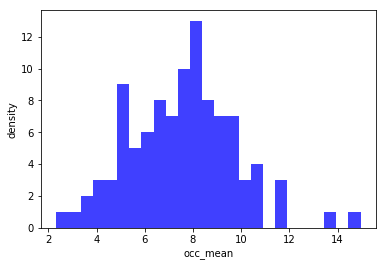

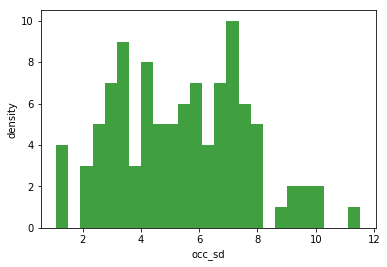

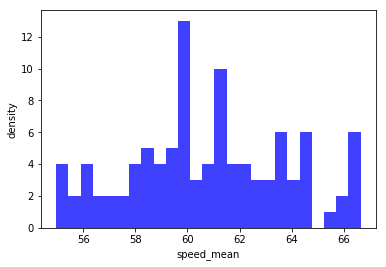

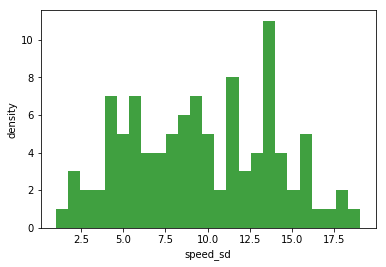

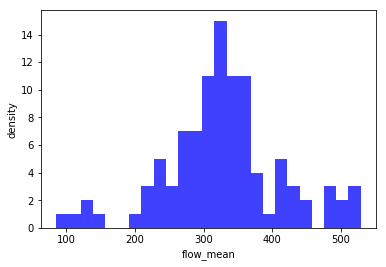

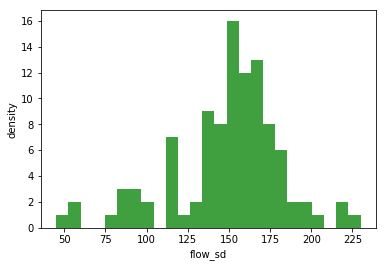

In [13]:
cols = mean_sd_df.columns.values.tolist()
for col in cols:
    des_stat = col.split('_')[1]
    n, bins, patches = plt.hist(mean_sd_df[col].values, 25, density=False, facecolor=descriptive_colors[des_stat], alpha=.75)
    plt.xlabel(col)
    plt.ylabel('density')
    plt.show()

## Mean-SD plot

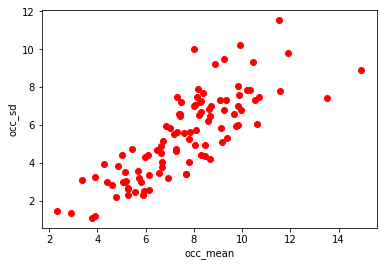

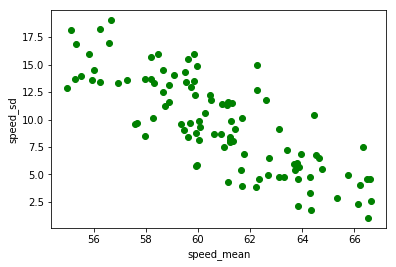

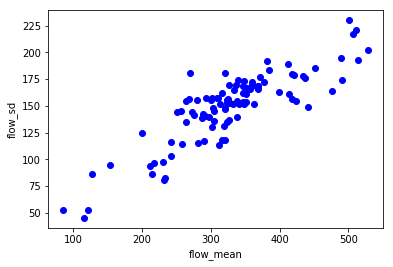

In [14]:
colors = ['ro', 'go', 'bo']
for i, var in enumerate(var_names):
    var_mean = var + '_mean'
    var_sd = var + '_sd'
    plt.plot(mean_sd_df[var_mean].values, mean_sd_df[var_sd].values, colors[i])
    plt.xlabel(var_mean)
    plt.ylabel(var_sd)
    plt.show()

## Regression Analysis

In [15]:
import statsmodels.api as sm

### Occupancy

In [16]:
occ_means = mean_sd_df['occ_mean'].values
occ_sds = mean_sd_df['occ_sd'].values

In [17]:
X = pd.DataFrame({
    'occ_mean': occ_means
})
X = sm.add_constant(X)
Y = pd.DataFrame({
    'occ_sd': occ_sds
})

In [18]:
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 occ_sd   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     193.5
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           4.08e-25
Time:                        09:48:21   Log-Likelihood:                -171.56
No. Observations:                 102   AIC:                             347.1
Df Residuals:                     100   BIC:                             352.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7530      0.462     -1.631      0.1

In [19]:
occ_sd_pred = model.predict(X)

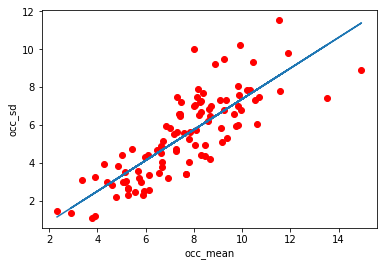

In [20]:
plt.plot(mean_sd_df['occ_mean'].values, mean_sd_df['occ_sd'].values, 'ro')
plt.plot(mean_sd_df['occ_mean'].values, occ_sd_pred)
plt.xlabel('occ_mean')
plt.ylabel('occ_sd')
plt.show()

### Speed

In [21]:
speed_means = mean_sd_df['speed_mean'].values
speed_sds = mean_sd_df['speed_sd'].values

In [22]:
speed_X = pd.DataFrame({
    'speed_mean': speed_means
})
speed_X = sm.add_constant(speed_X)
speed_Y = pd.DataFrame({
    'speed_sd': speed_sds
})

In [23]:
speed_model = sm.OLS(speed_Y, speed_X).fit()
speed_summary = speed_model.summary()
print(speed_summary)

                            OLS Regression Results                            
Dep. Variable:               speed_sd   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     178.4
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           5.81e-24
Time:                        09:48:22   Log-Likelihood:                -240.89
No. Observations:                 102   AIC:                             485.8
Df Residuals:                     100   BIC:                             491.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.1777      5.214     15.184      0.0

In [24]:
speed_sd_pred = speed_model.predict(speed_X)

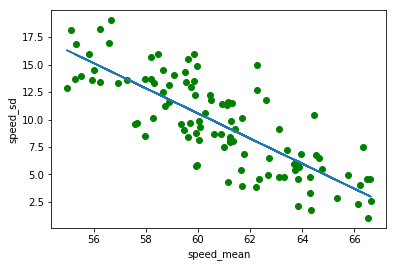

In [25]:
plt.plot(mean_sd_df['speed_mean'].values, mean_sd_df['speed_sd'].values, 'go')
plt.plot(mean_sd_df['speed_mean'].values, speed_sd_pred)
plt.xlabel('speed_mean')
plt.ylabel('speed_sd')
plt.show()

### Flow

In [26]:
flow_means = mean_sd_df['flow_mean'].values
flow_sds = mean_sd_df['flow_sd'].values

In [27]:
flow_X = pd.DataFrame({
    'flow_mean': flow_means
})
flow_X = sm.add_constant(flow_X)
flow_Y = pd.DataFrame({
    'flow_sd': flow_sds
})

In [28]:
flow_model = sm.OLS(flow_Y, flow_X).fit()
flow_summary = flow_model.summary()
print(flow_summary)

                            OLS Regression Results                            
Dep. Variable:                flow_sd   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     276.1
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           1.59e-30
Time:                        09:48:22   Log-Likelihood:                -435.28
No. Observations:                 102   AIC:                             874.6
Df Residuals:                     100   BIC:                             879.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1658      6.854      5.714      0.0

In [29]:
flow_sd_pred = flow_model.predict(flow_X)

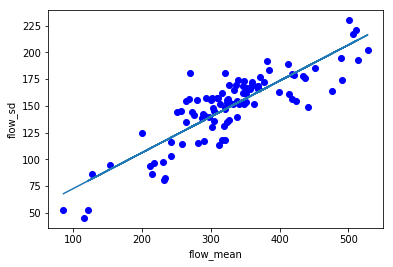

In [30]:
plt.plot(mean_sd_df['flow_mean'].values, mean_sd_df['flow_sd'].values, 'bo')
plt.plot(mean_sd_df['flow_mean'].values, flow_sd_pred)
plt.xlabel('flow_mean')
plt.ylabel('flow_sd')
plt.show()

## Speed, Flow and Occupancy Distribution of a Detector Station

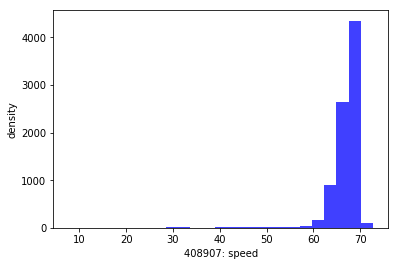

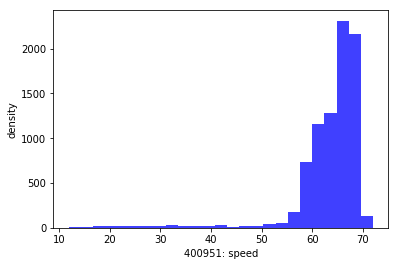

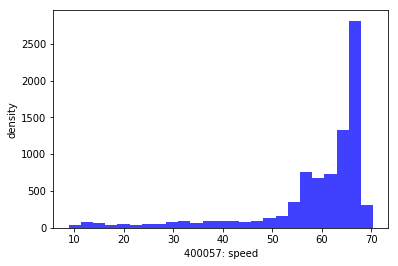

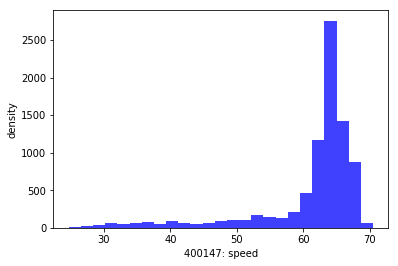

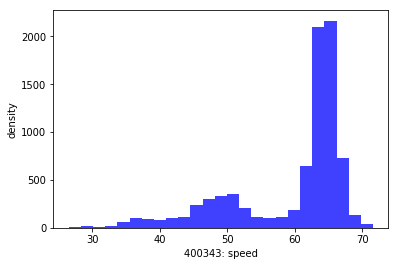

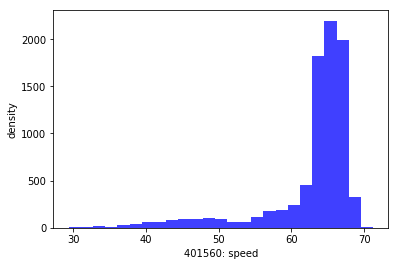

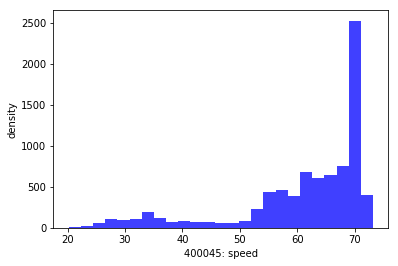

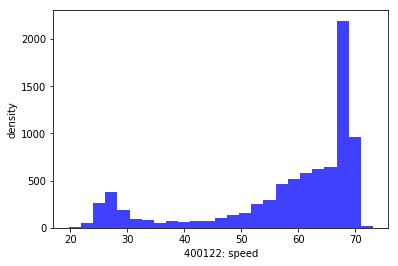

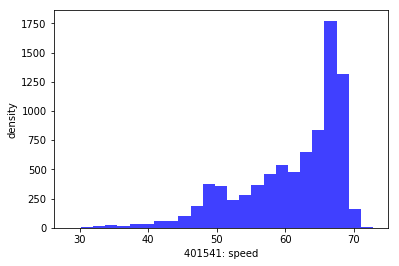

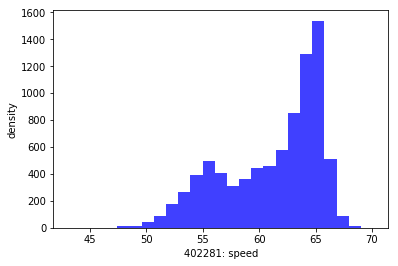

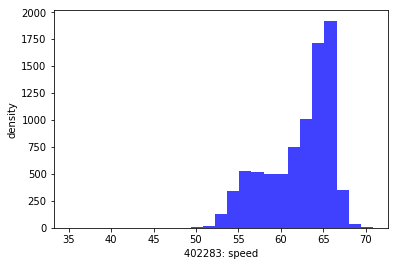

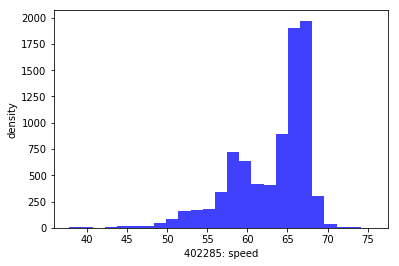

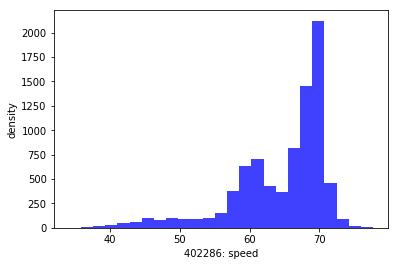

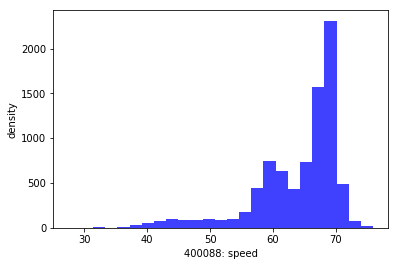

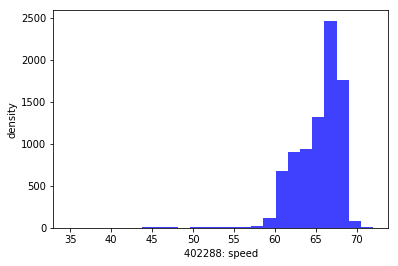

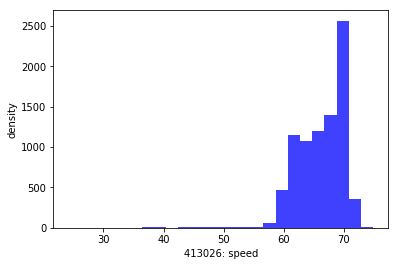

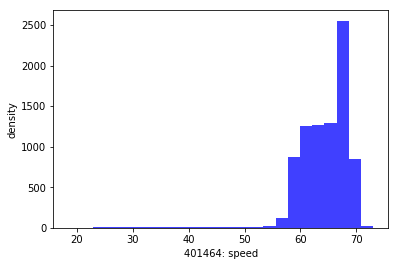

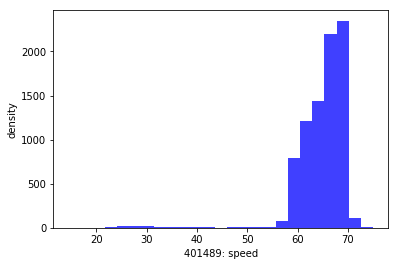

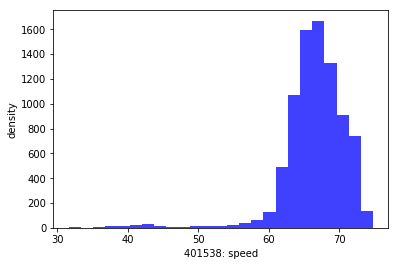

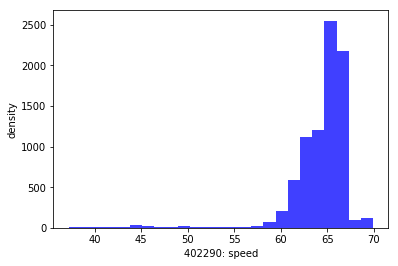

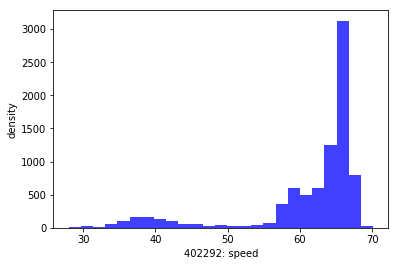

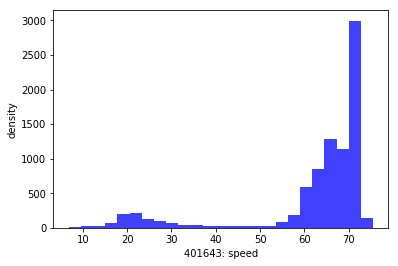

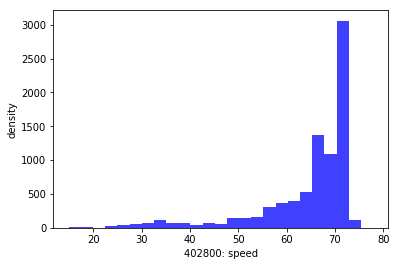

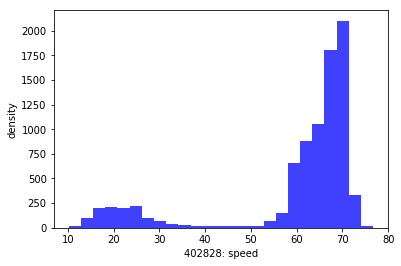

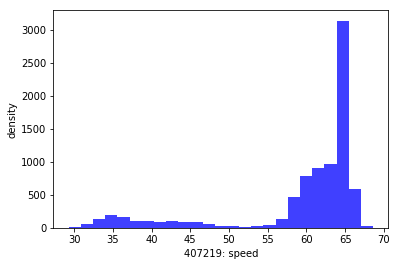

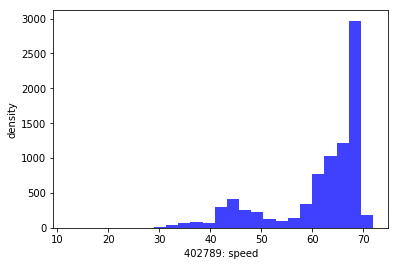

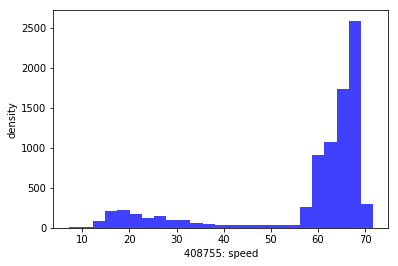

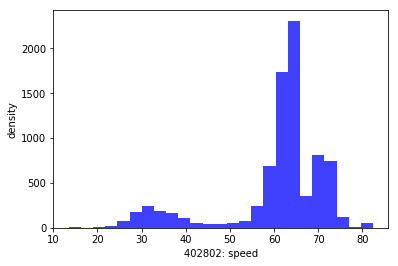

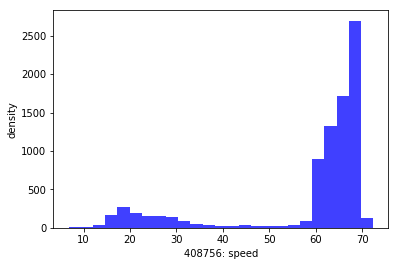

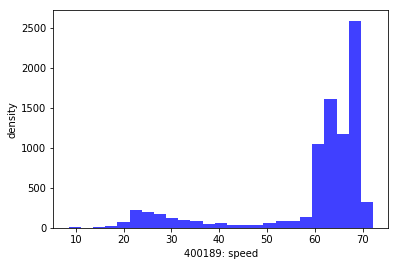

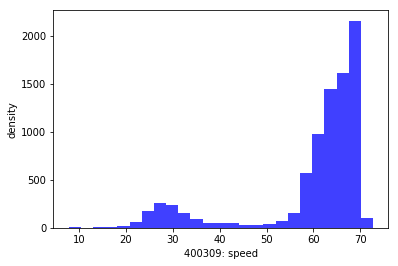

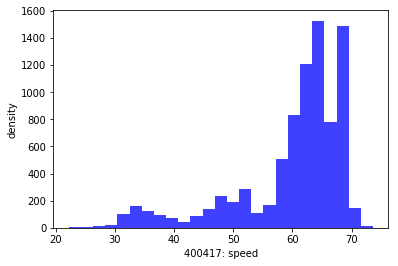

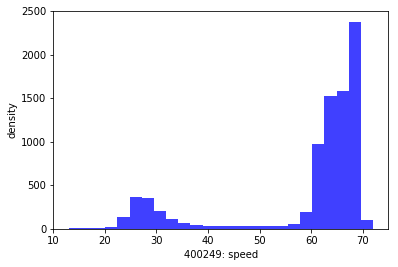

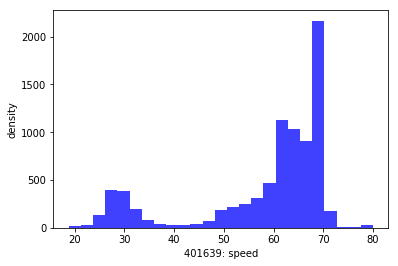

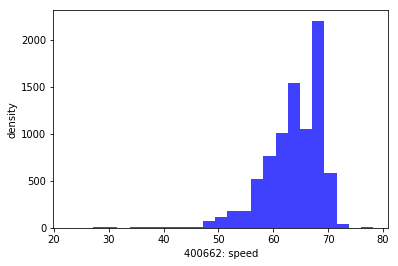

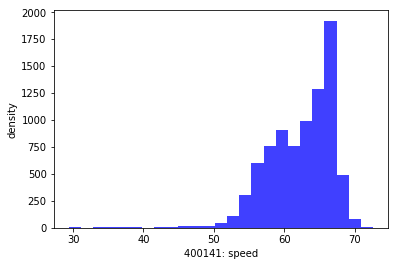

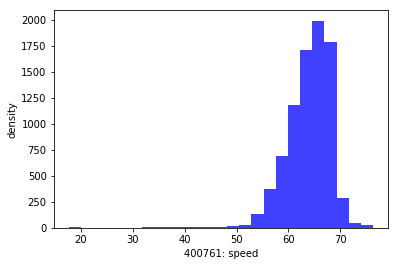

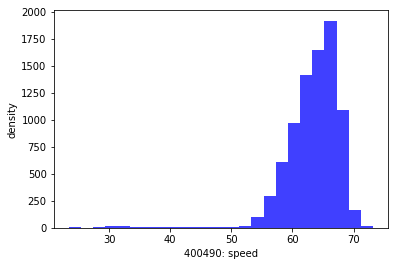

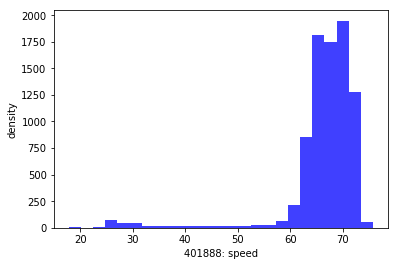

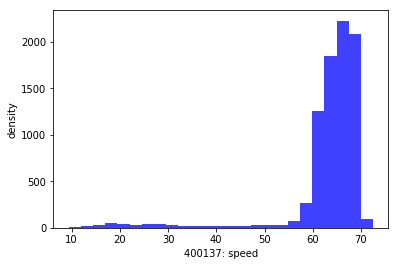

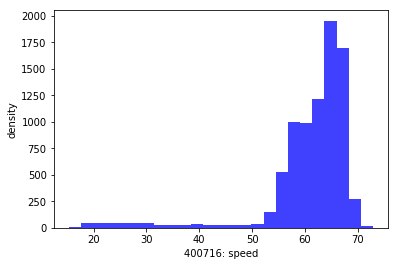

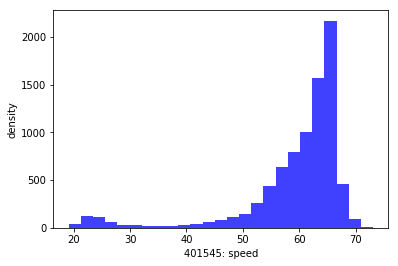

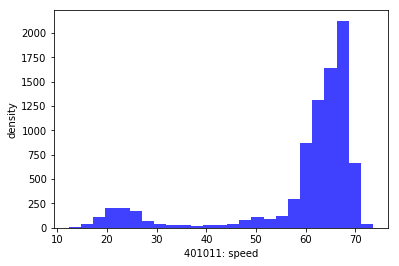

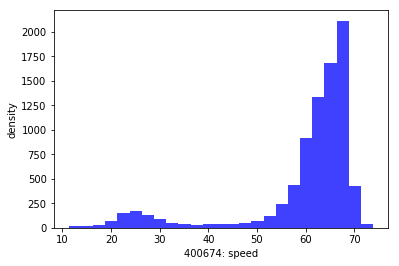

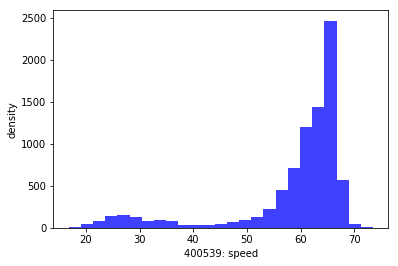

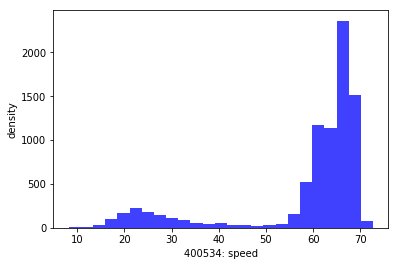

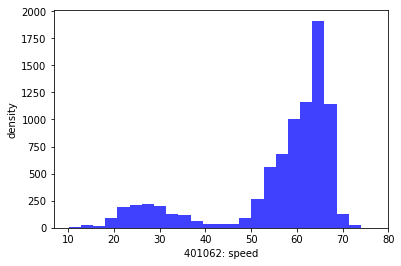

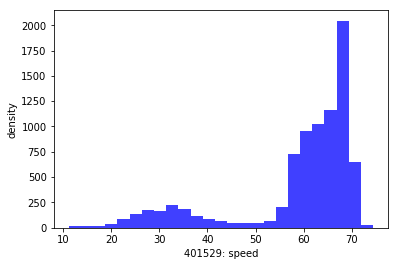

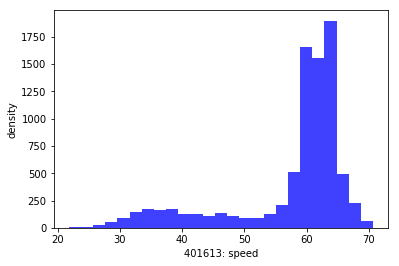

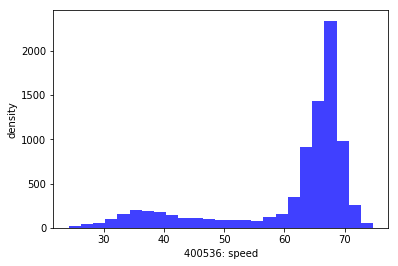

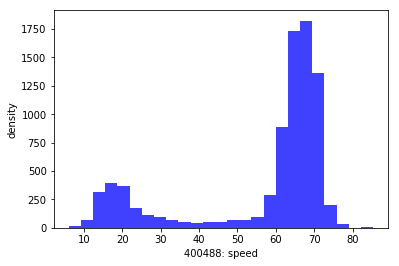

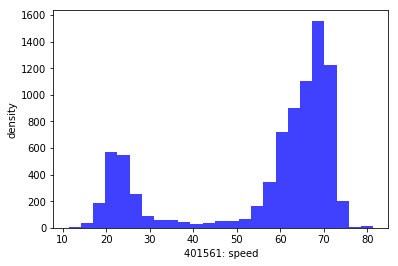

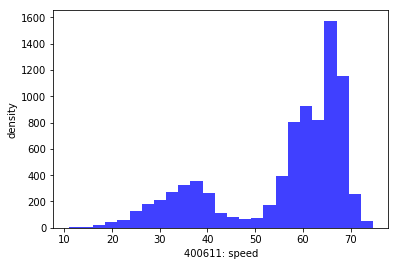

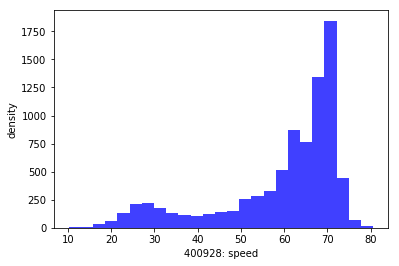

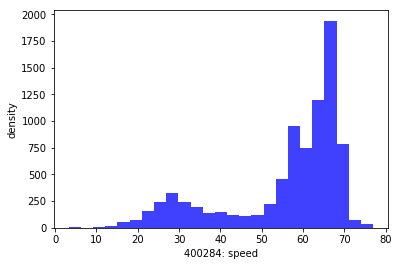

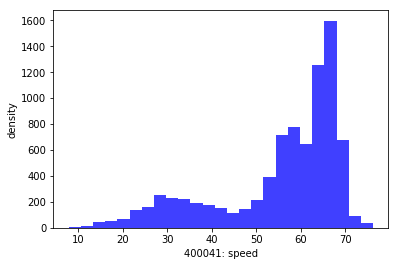

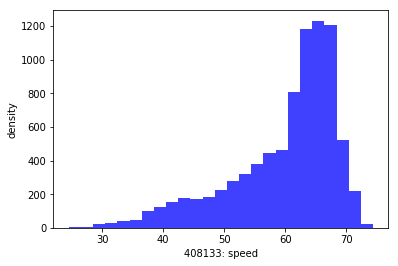

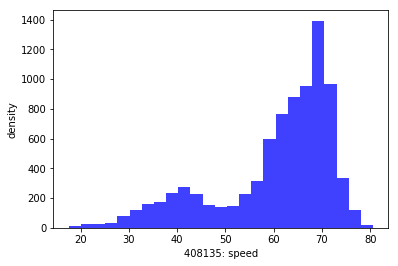

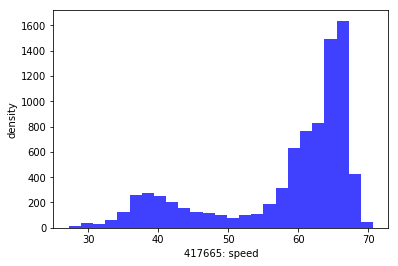

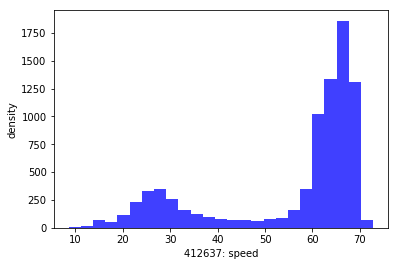

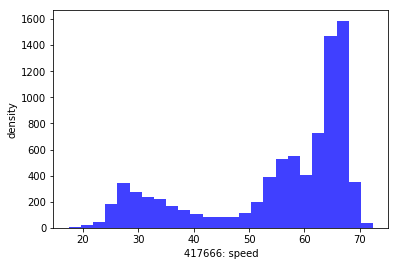

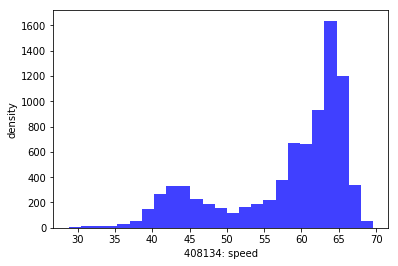

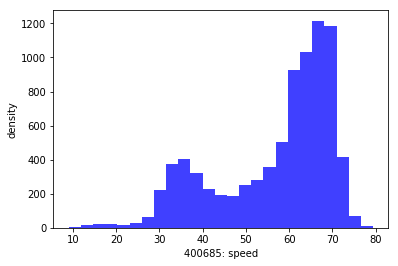

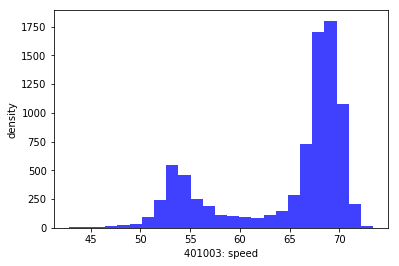

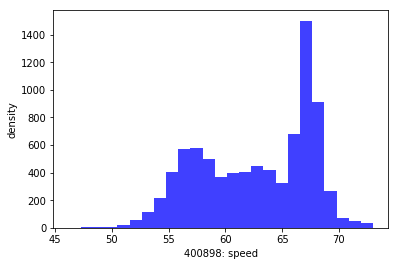

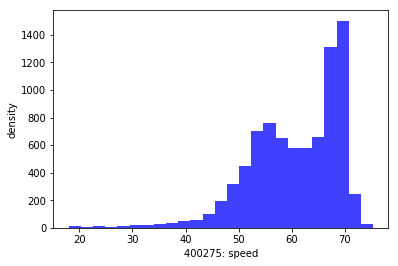

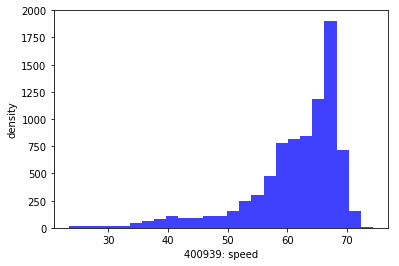

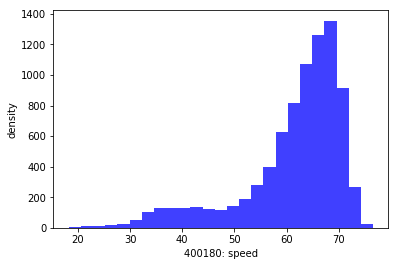

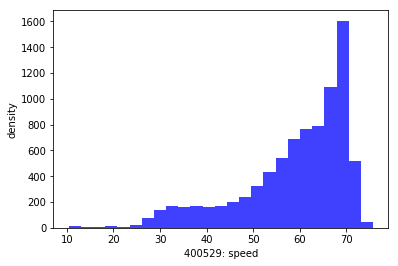

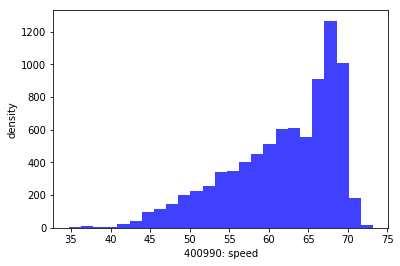

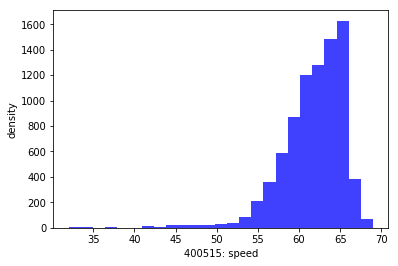

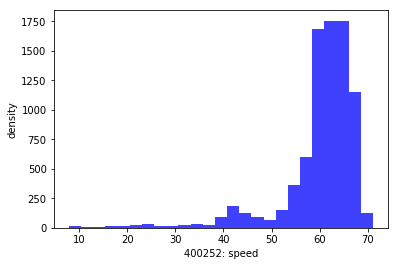

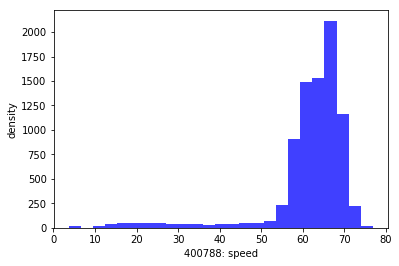

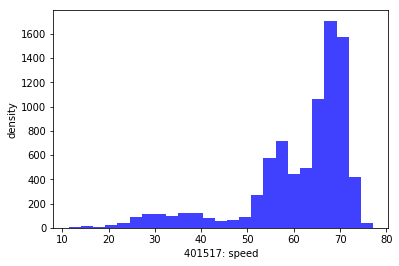

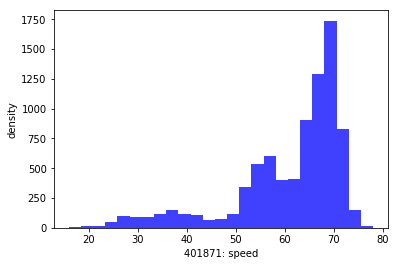

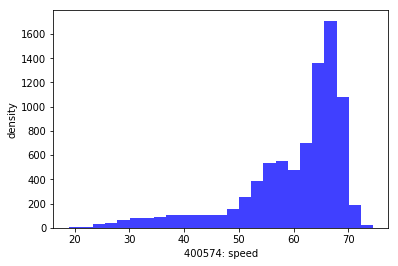

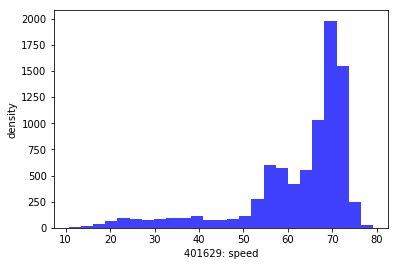

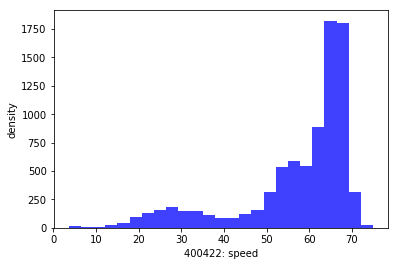

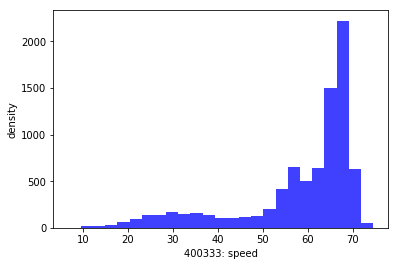

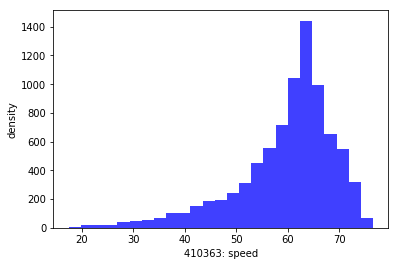

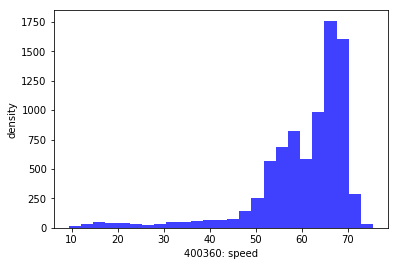

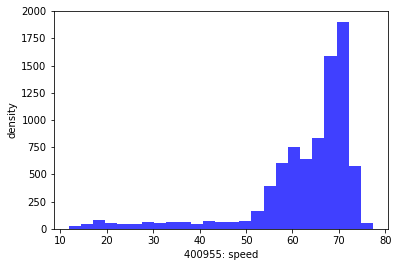

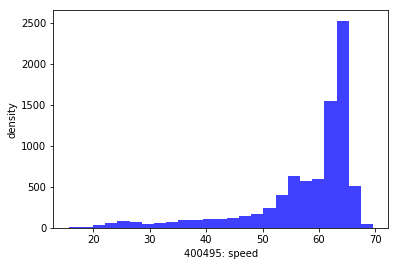

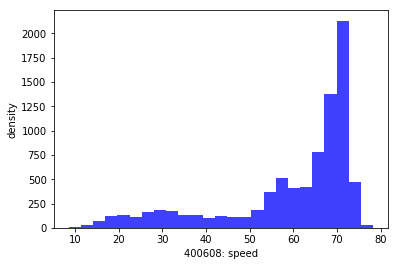

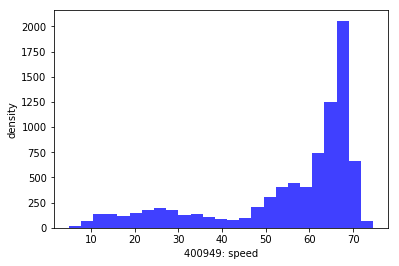

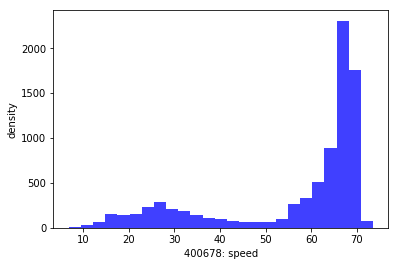

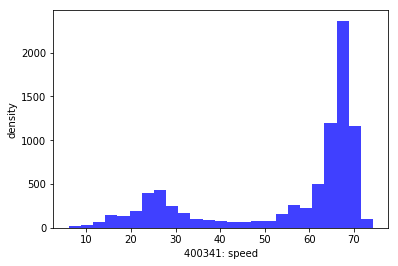

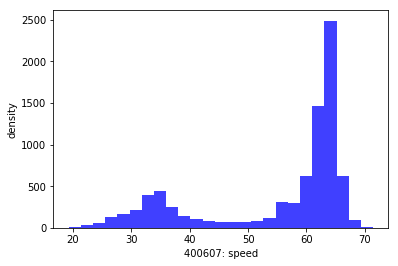

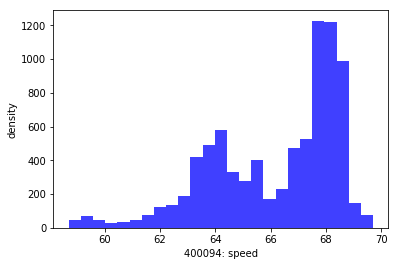

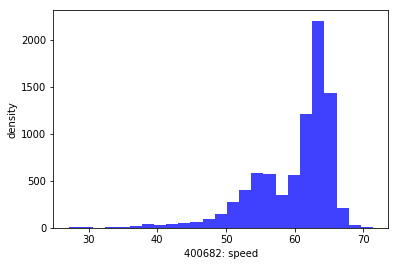

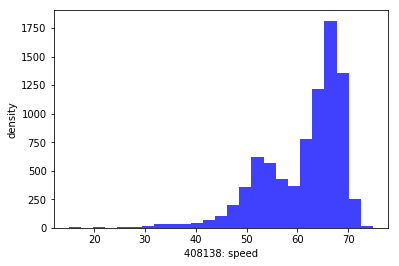

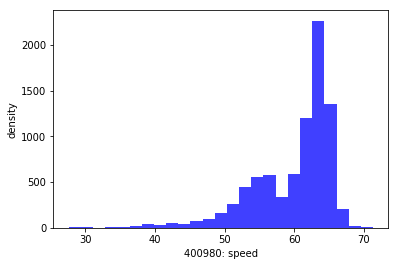

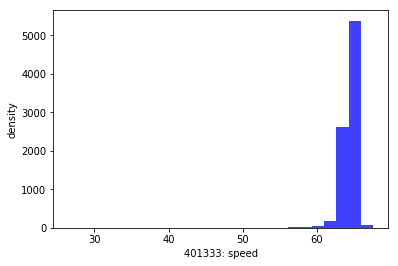

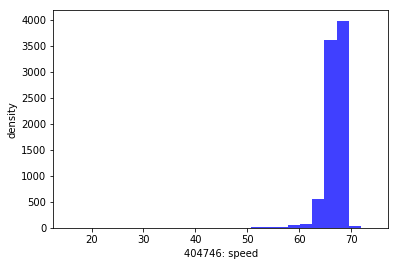

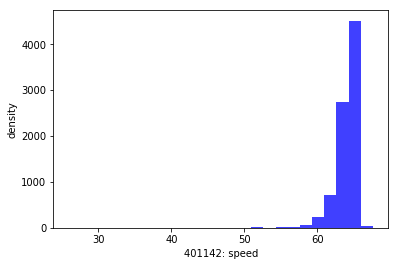

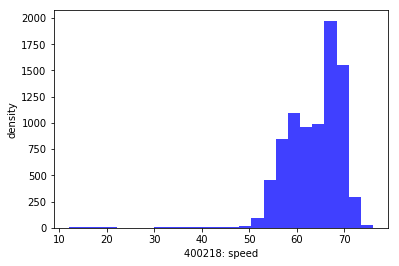

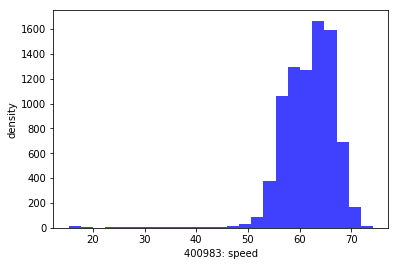

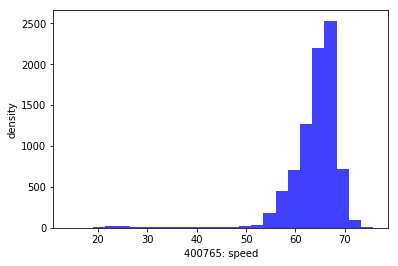

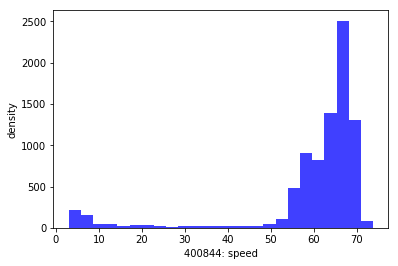

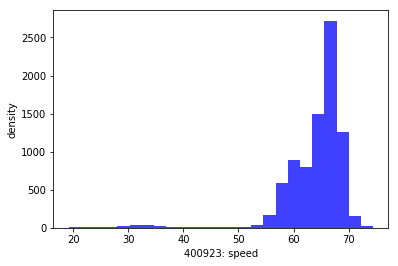

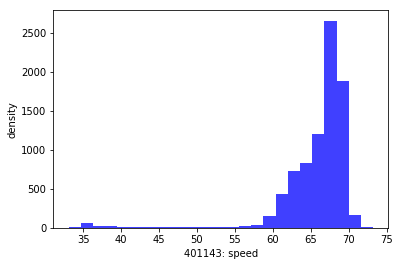

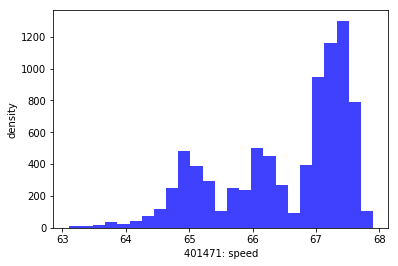

In [31]:
for s in stations:
    speed_s = raw_data.loc[raw_data['Station ID'] == s]['Speed'].values
    n, bins, patches = plt.hist(speed_s, 25, density=False, facecolor='b', alpha=.75)
    plt.xlabel(str(s) + ': speed')
    plt.ylabel('density')
    plt.show()

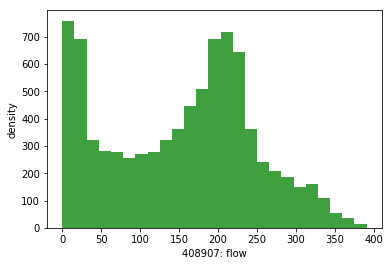

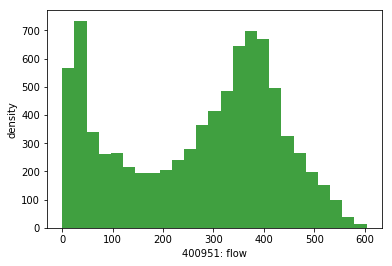

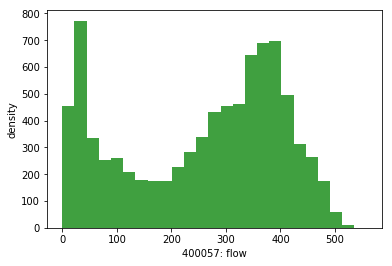

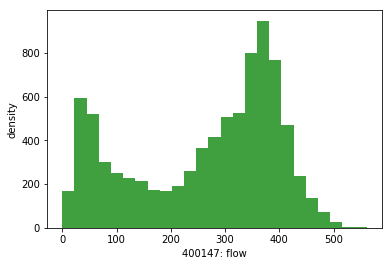

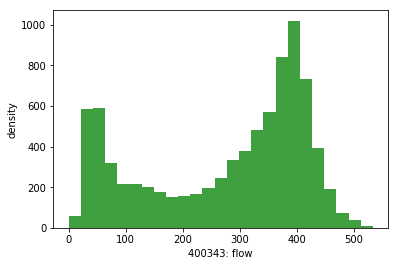

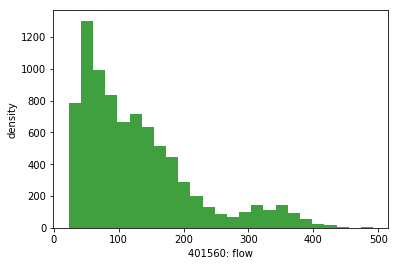

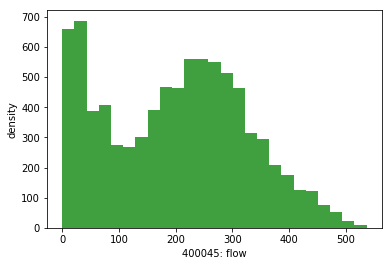

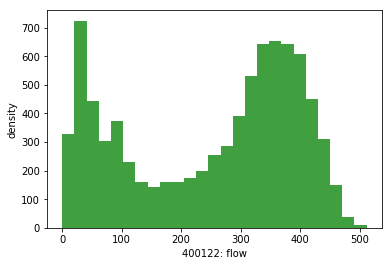

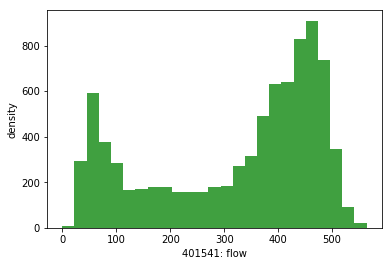

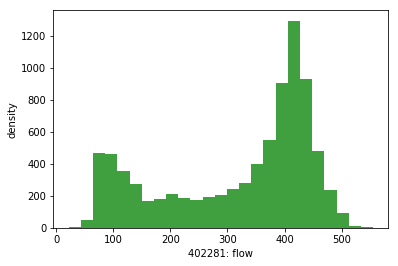

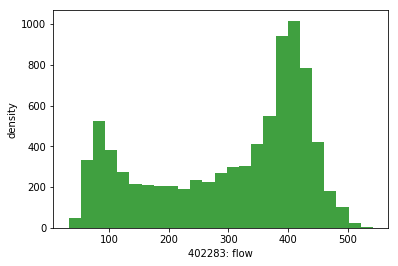

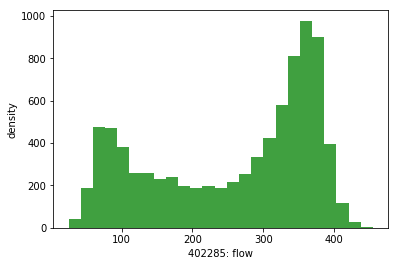

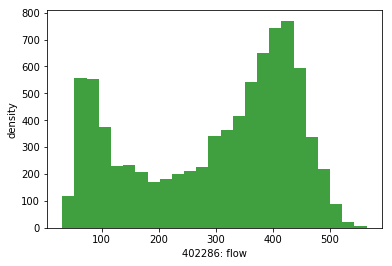

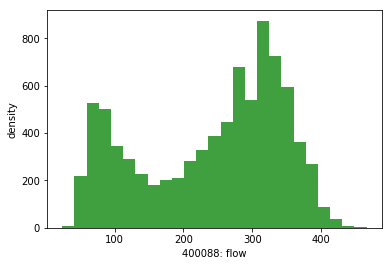

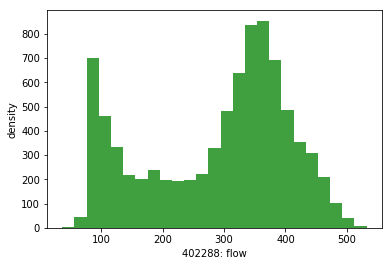

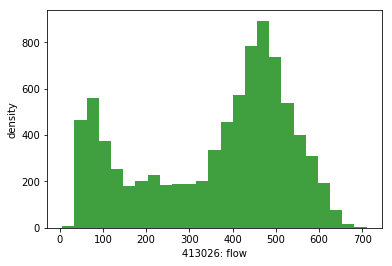

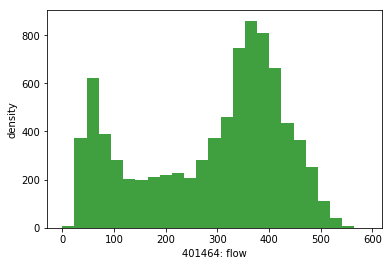

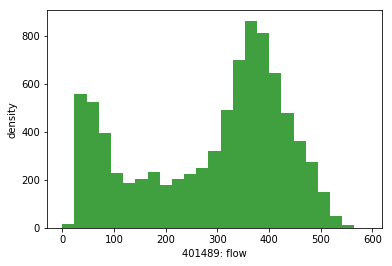

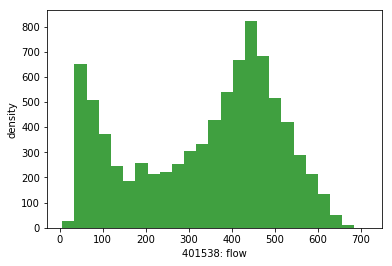

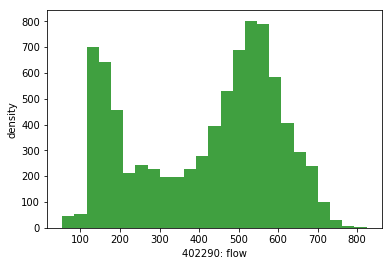

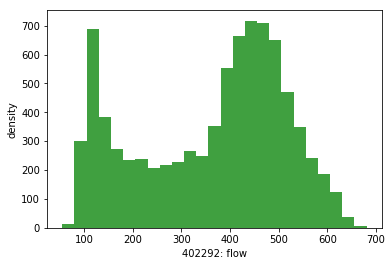

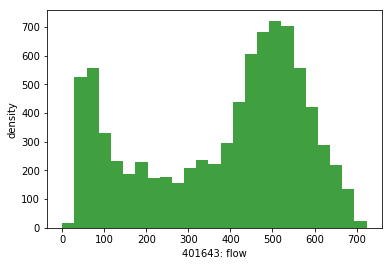

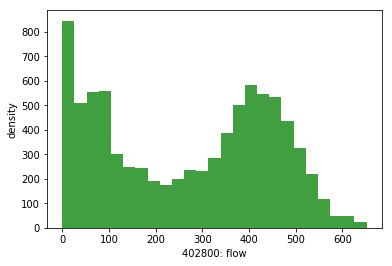

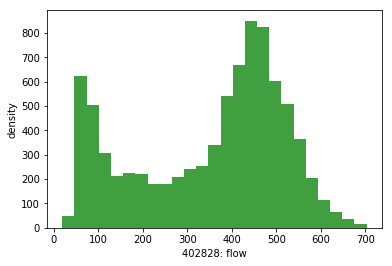

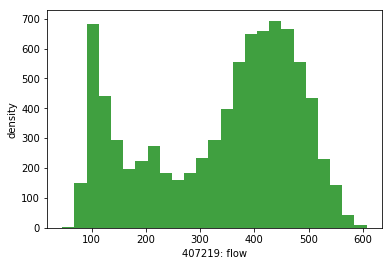

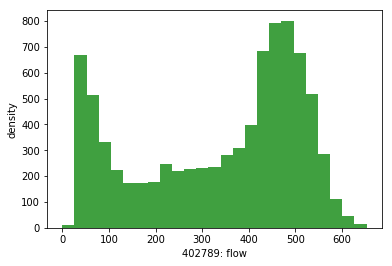

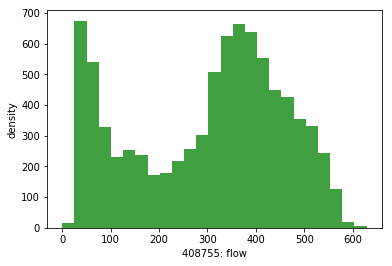

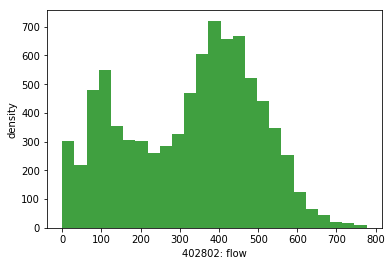

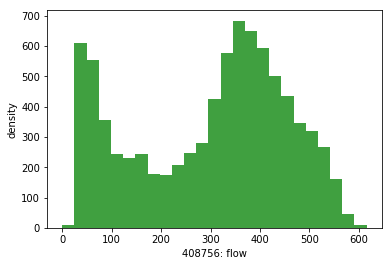

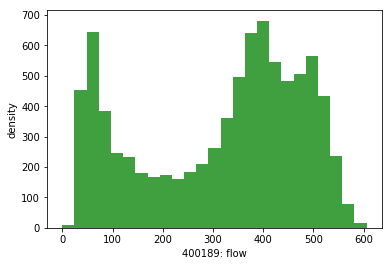

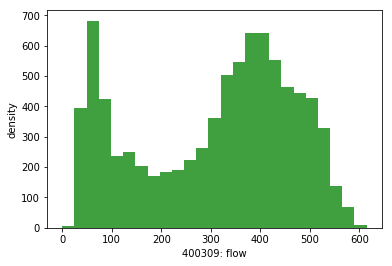

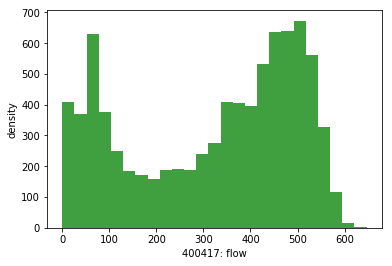

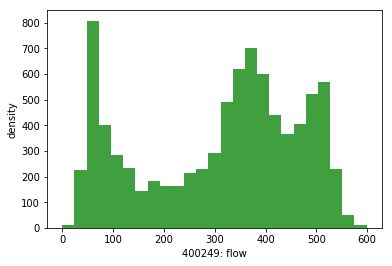

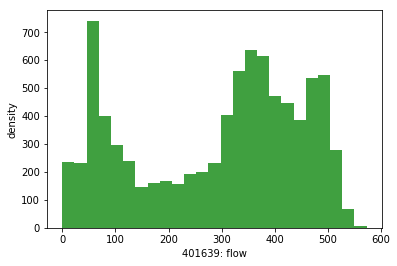

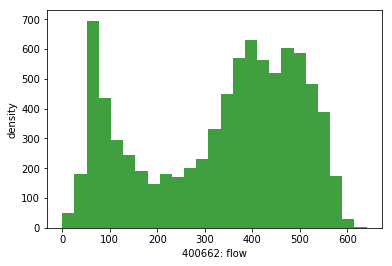

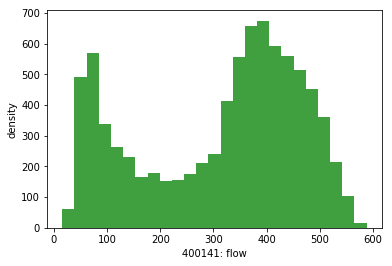

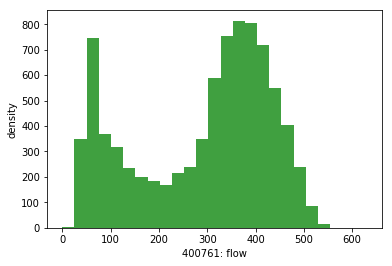

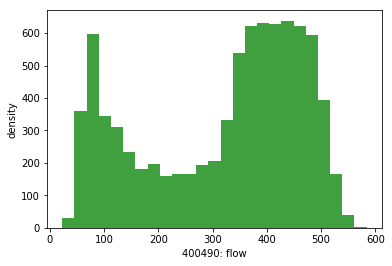

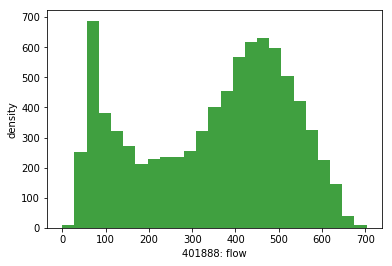

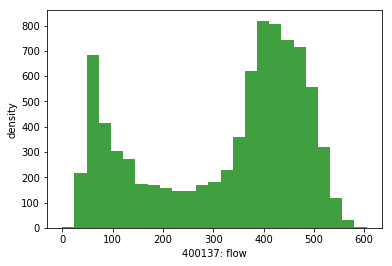

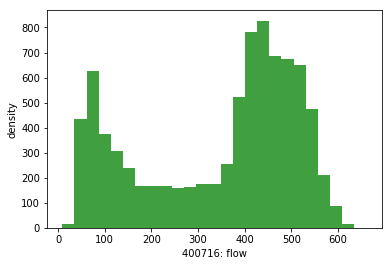

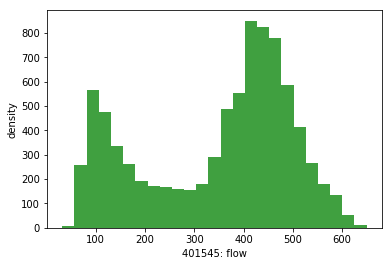

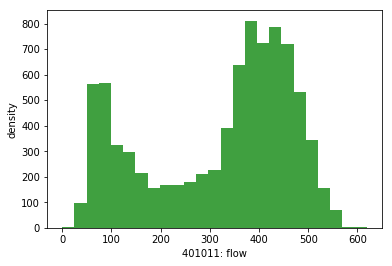

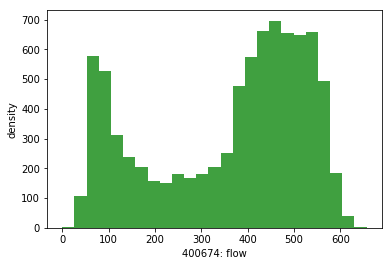

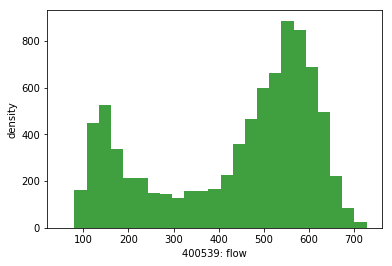

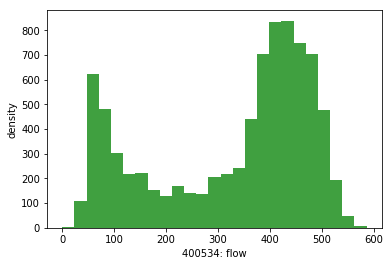

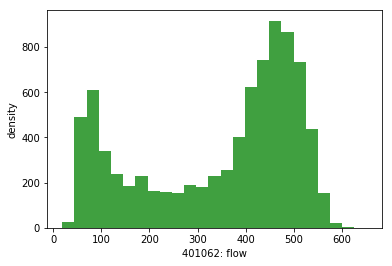

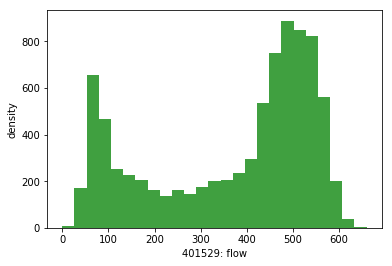

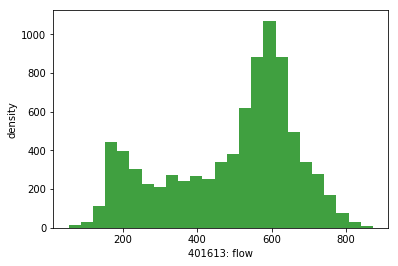

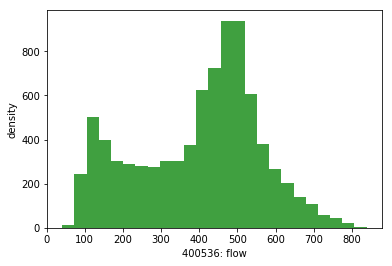

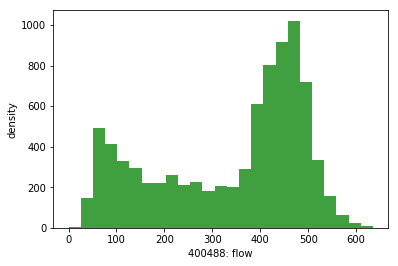

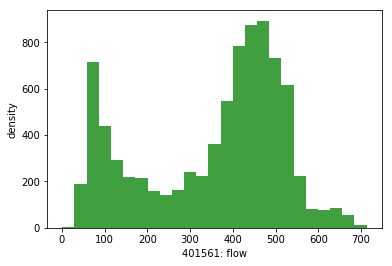

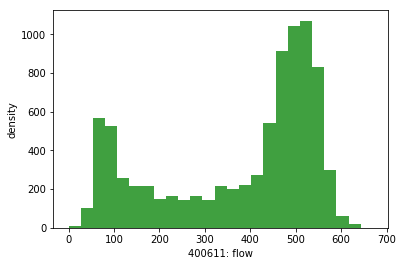

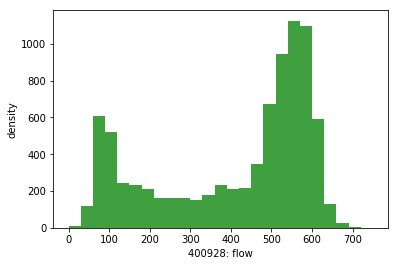

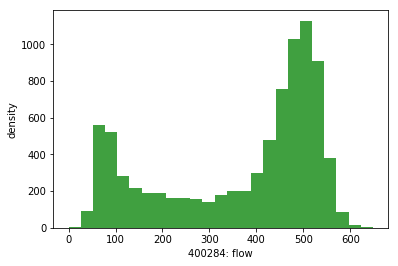

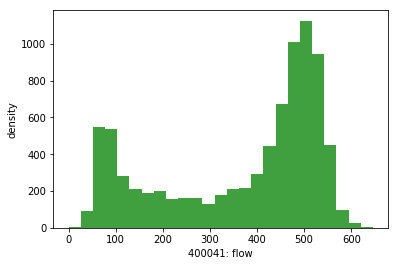

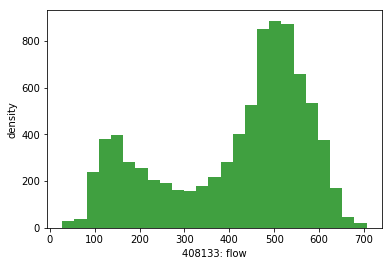

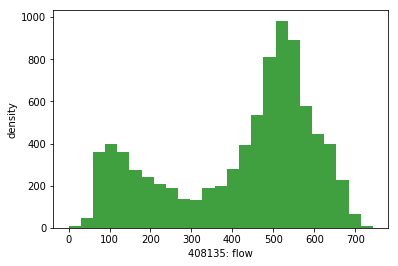

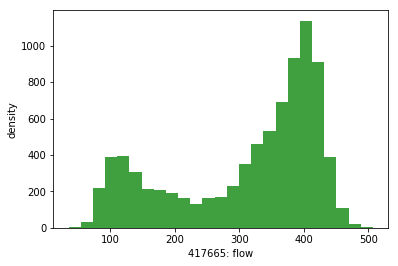

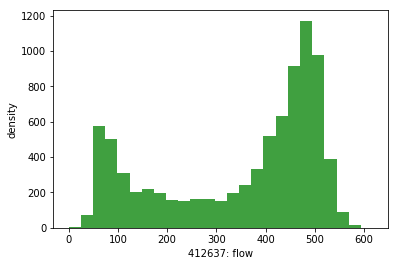

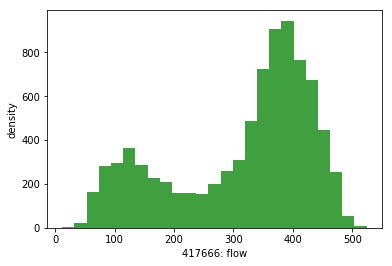

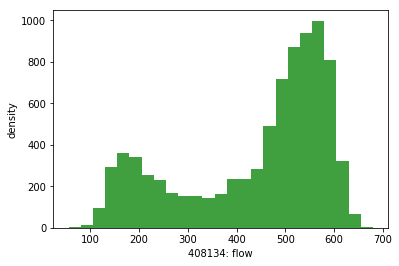

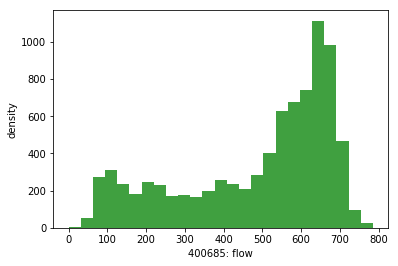

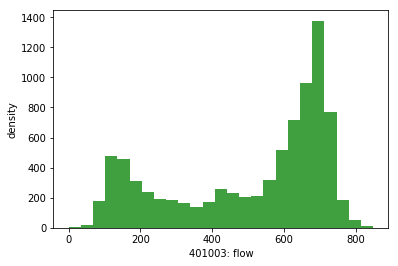

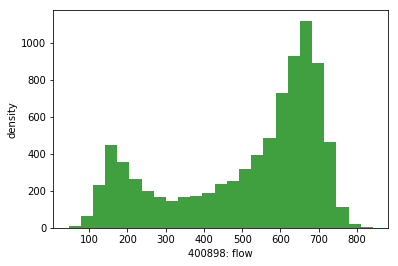

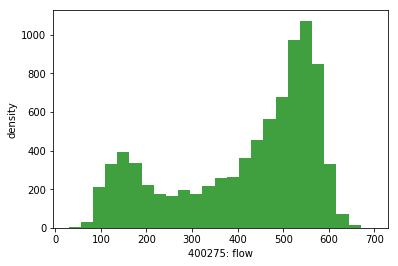

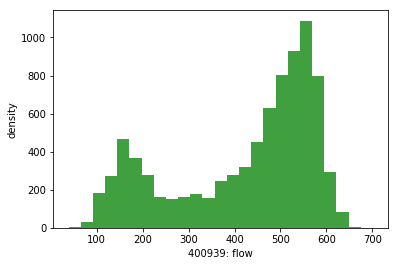

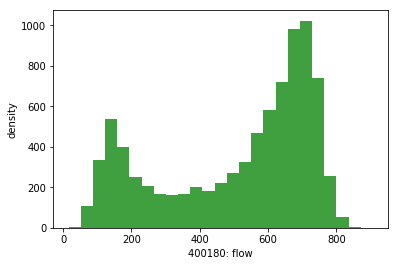

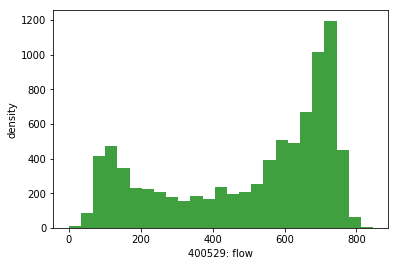

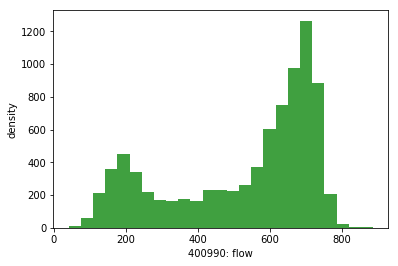

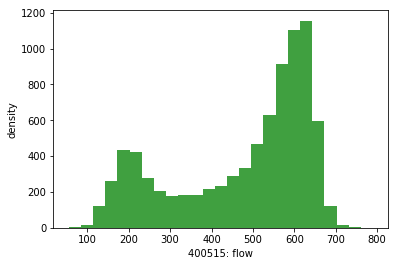

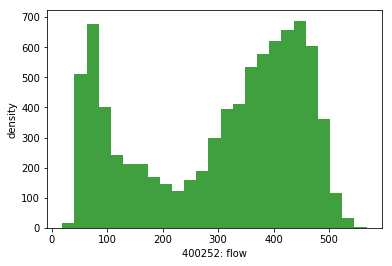

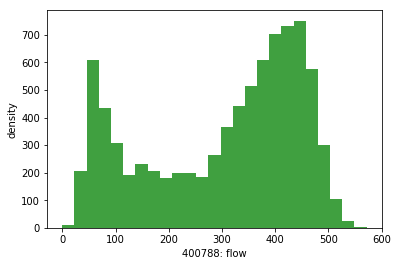

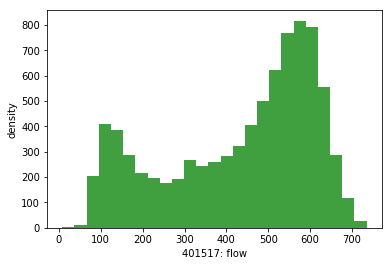

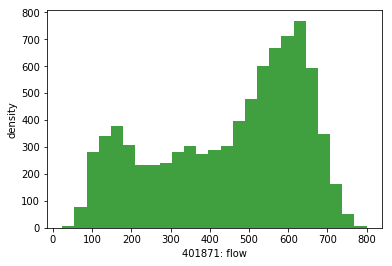

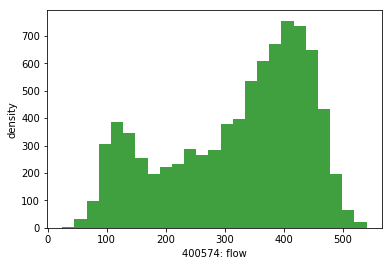

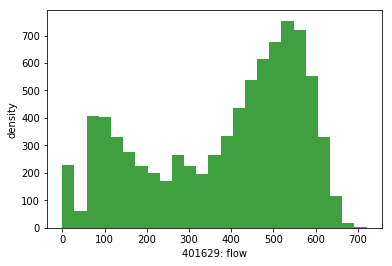

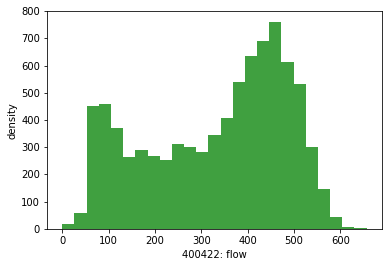

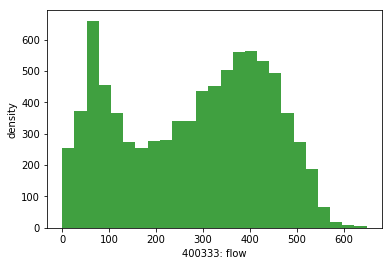

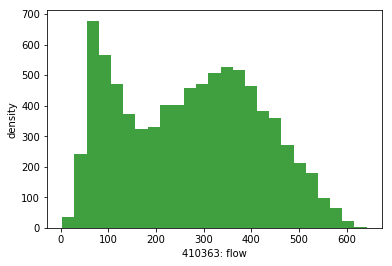

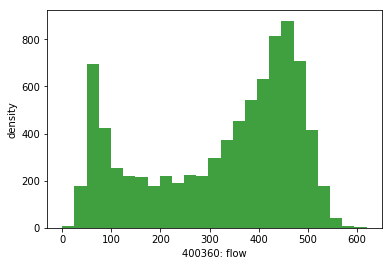

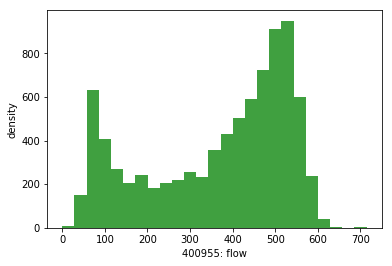

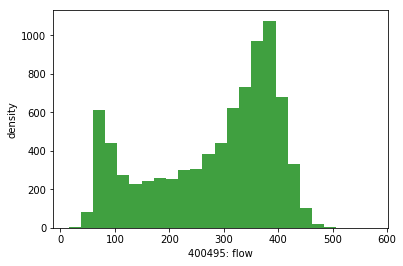

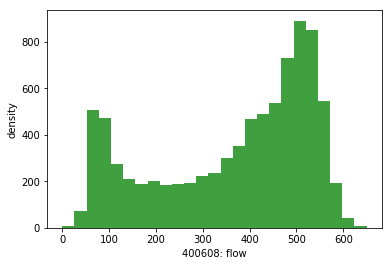

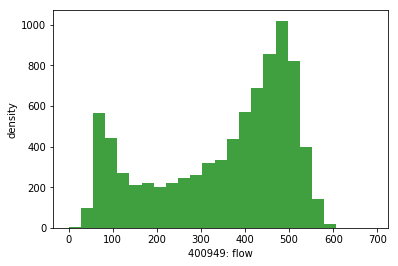

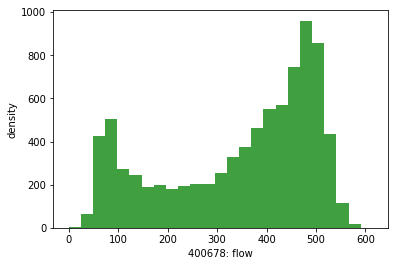

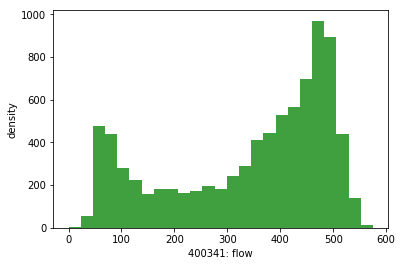

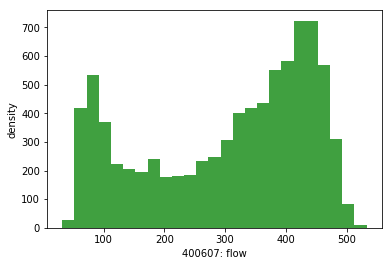

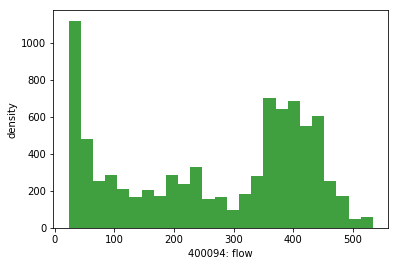

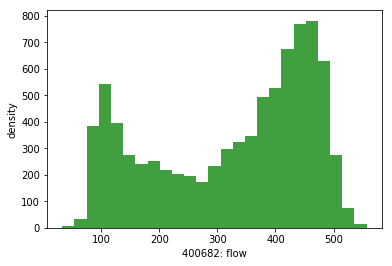

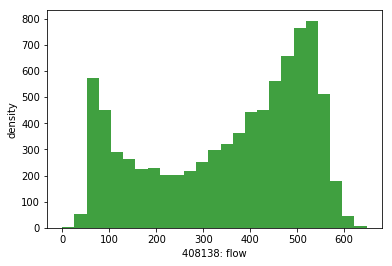

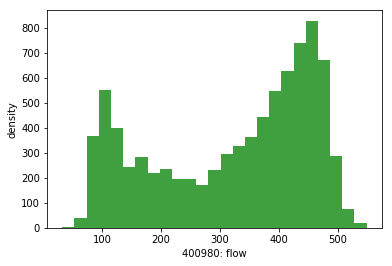

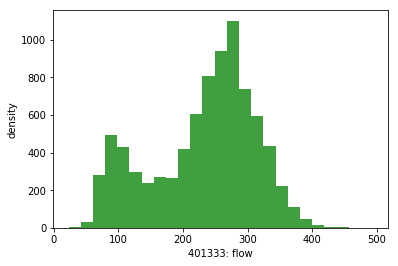

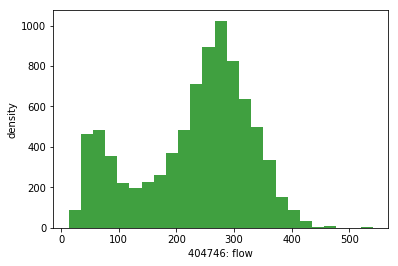

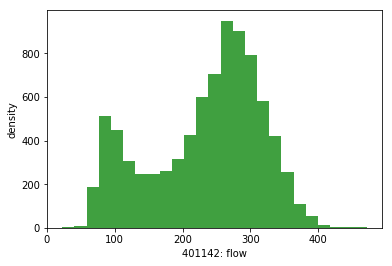

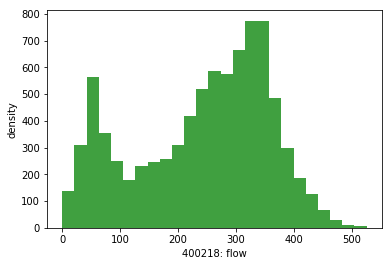

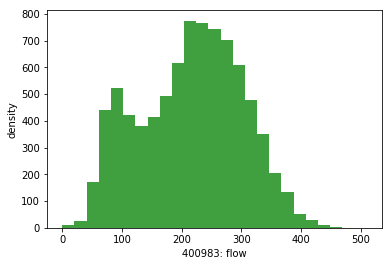

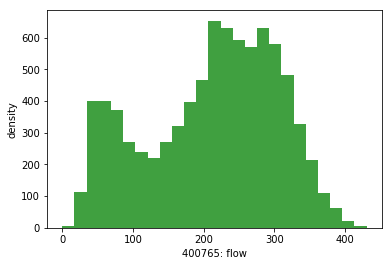

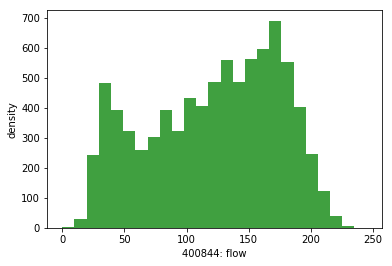

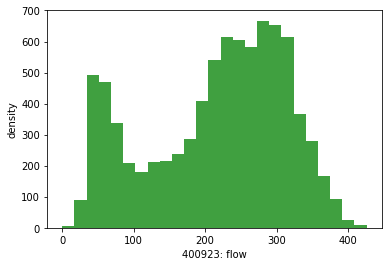

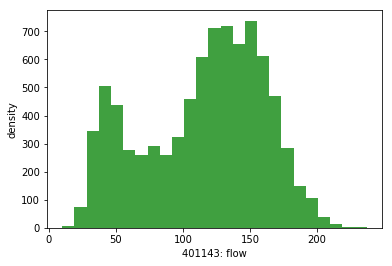

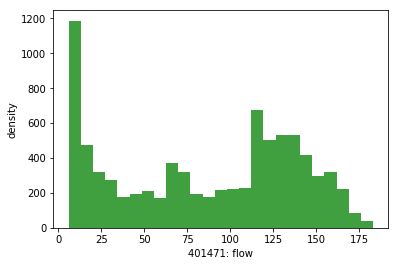

In [34]:
for s in stations:
    flow_s = raw_data.loc[raw_data['Station ID'] == s]['Flow'].values
    n, bins, patches = plt.hist(flow_s, 25, density=False, facecolor='g', alpha=.75)
    plt.xlabel(str(s) + ': flow')
    plt.ylabel('density')
    plt.show()

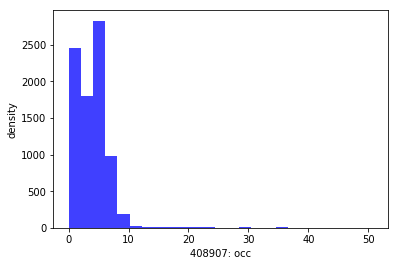

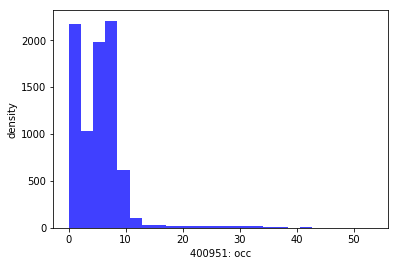

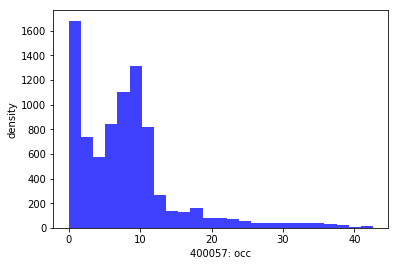

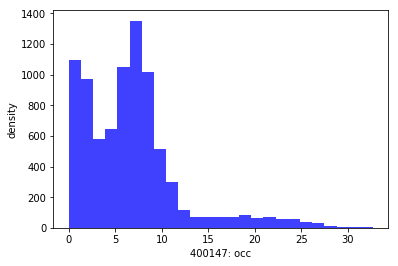

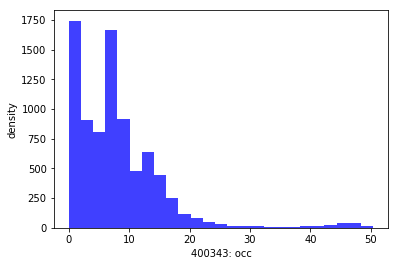

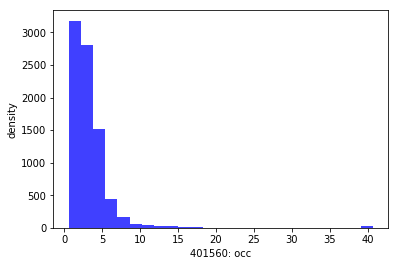

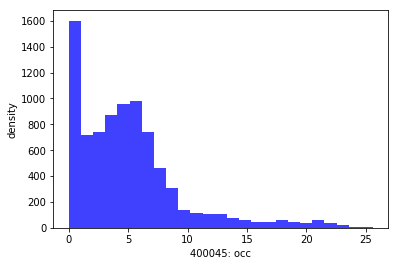

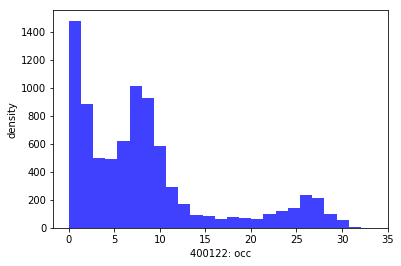

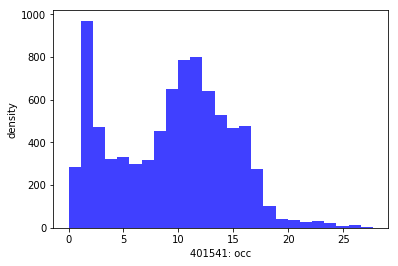

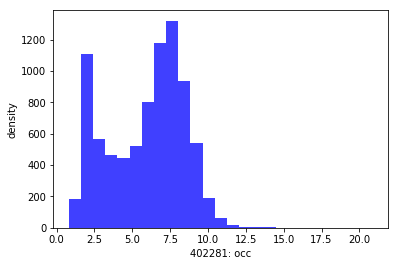

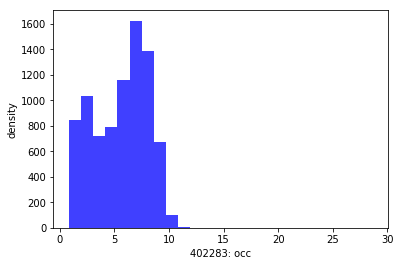

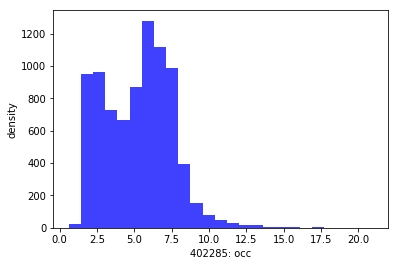

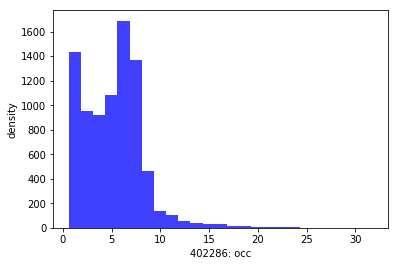

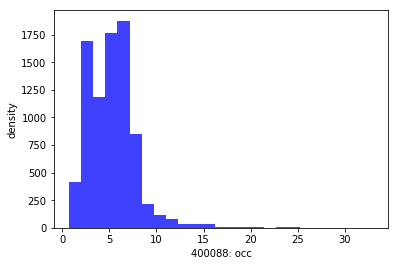

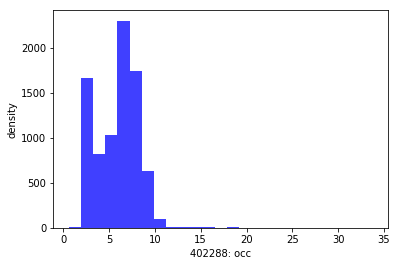

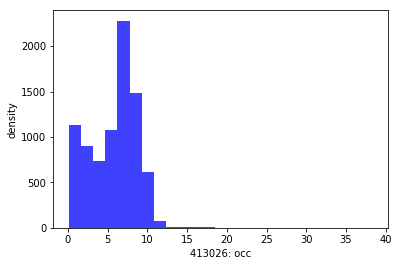

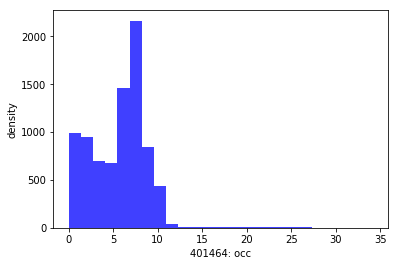

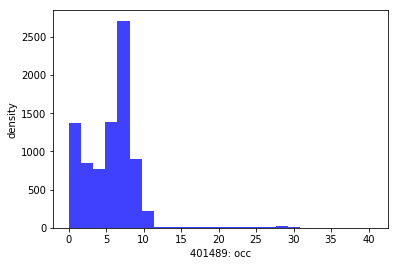

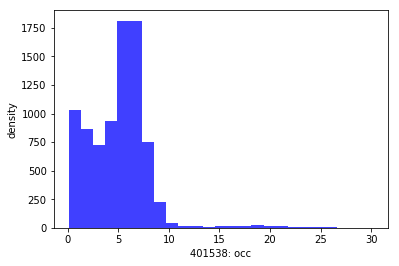

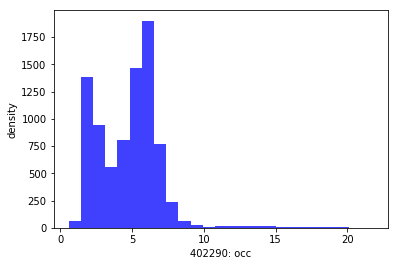

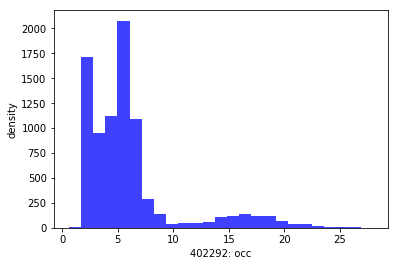

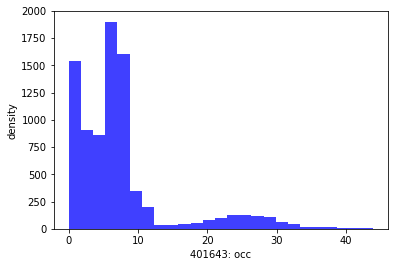

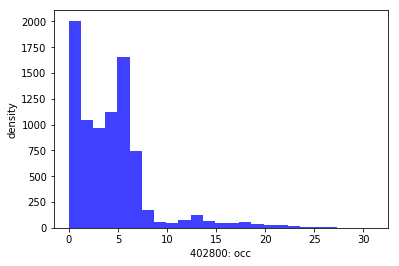

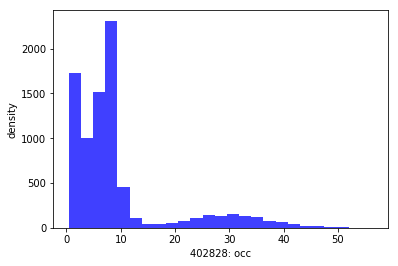

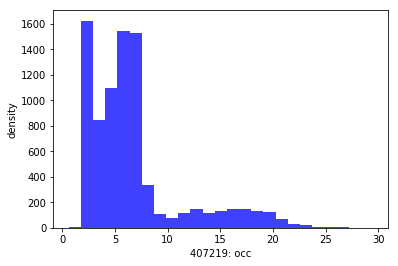

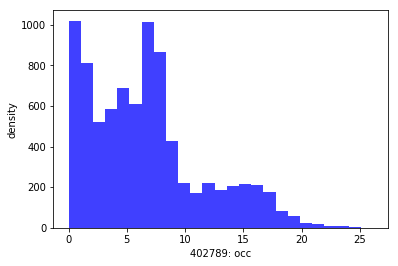

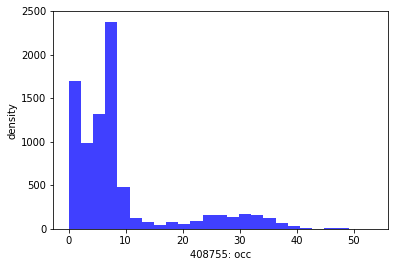

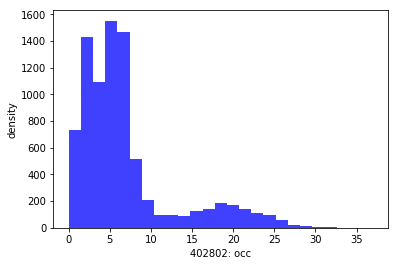

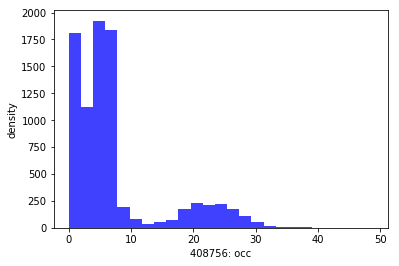

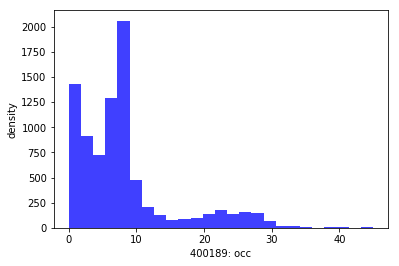

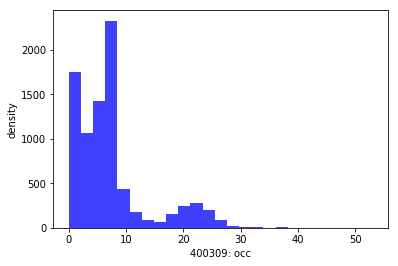

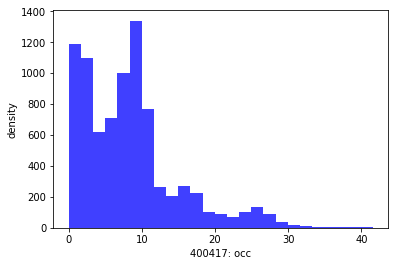

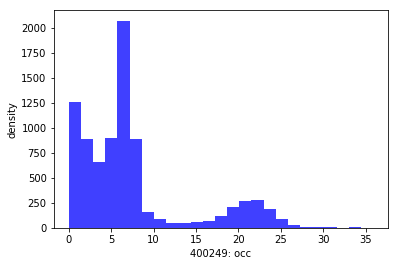

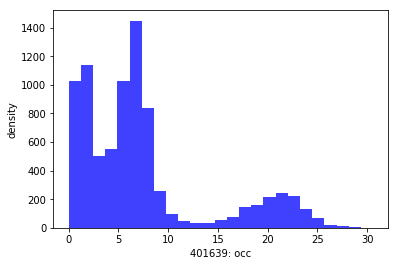

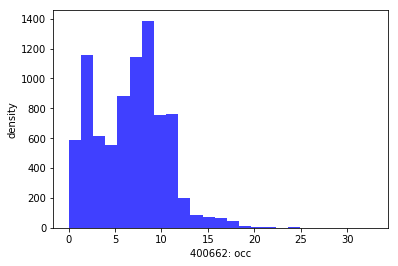

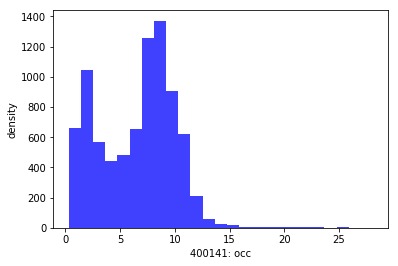

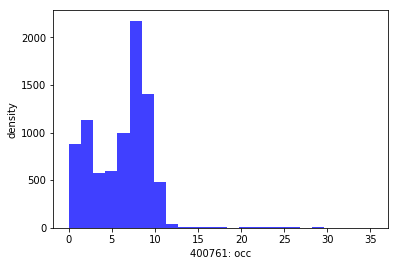

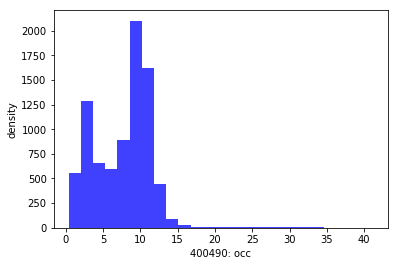

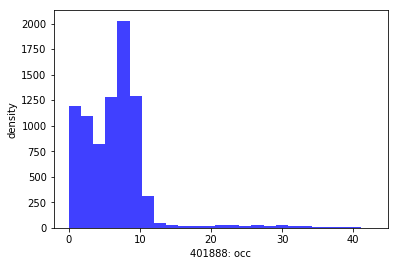

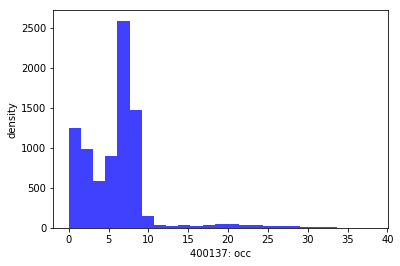

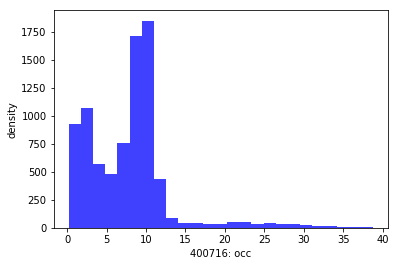

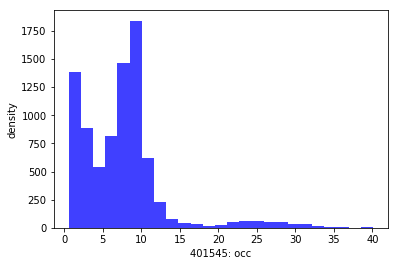

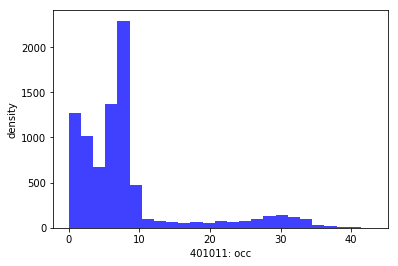

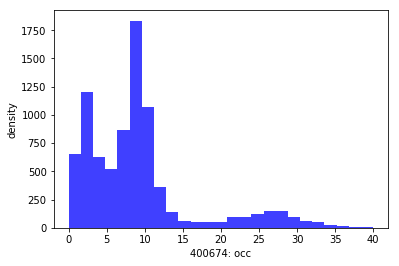

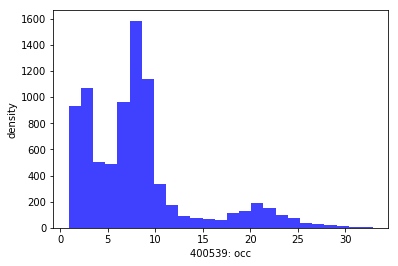

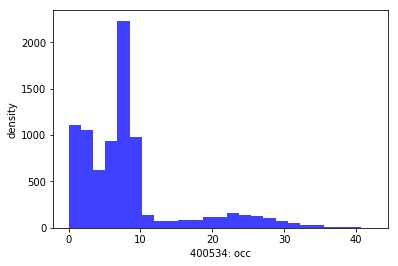

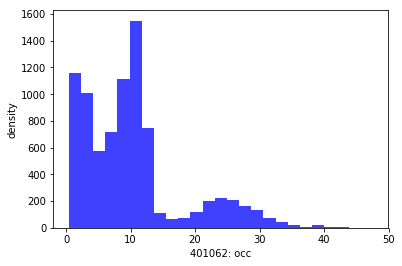

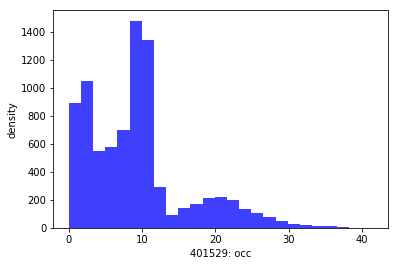

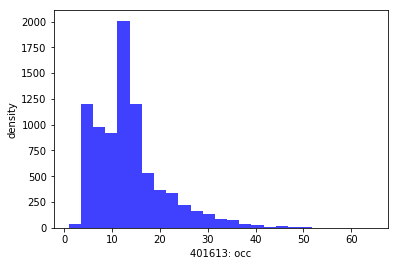

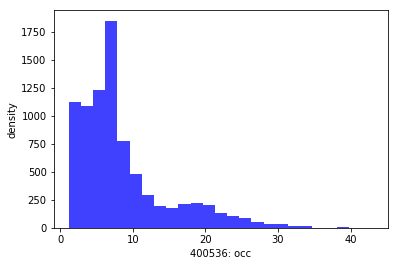

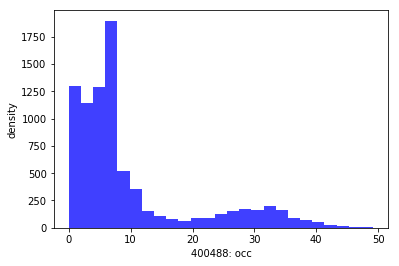

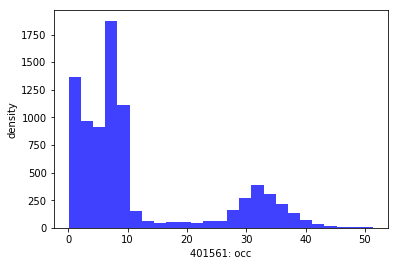

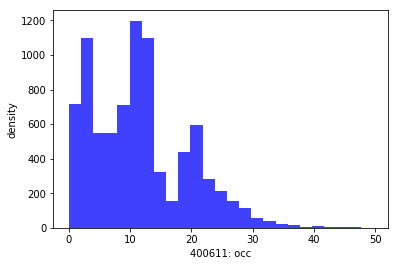

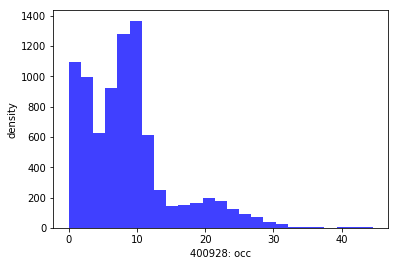

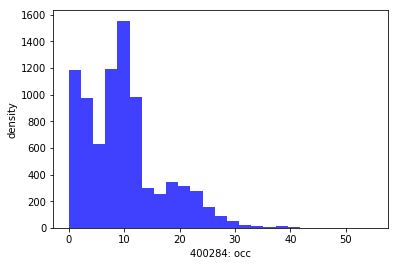

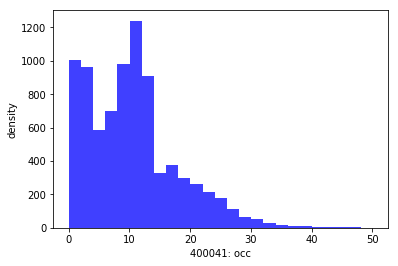

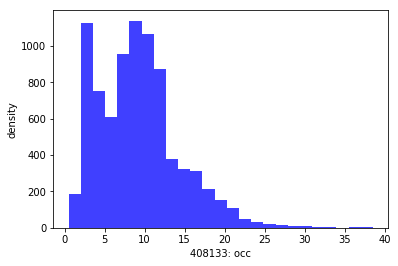

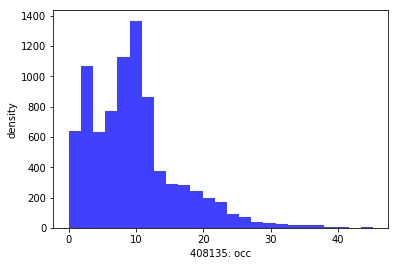

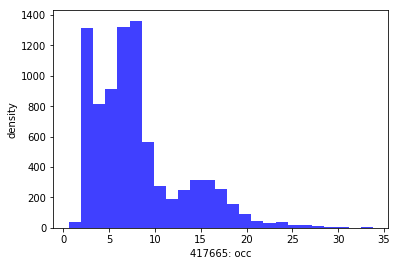

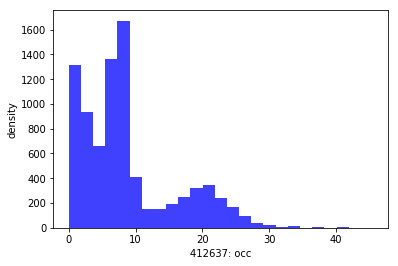

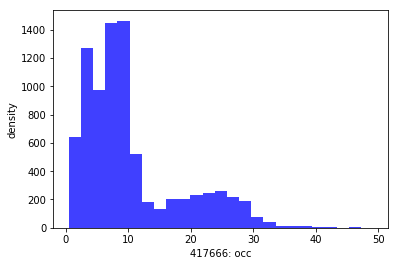

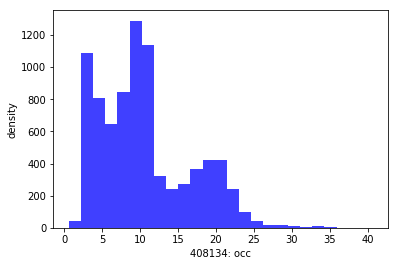

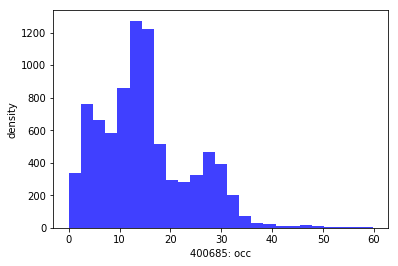

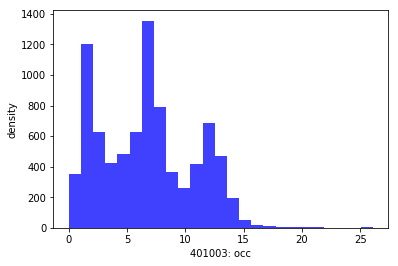

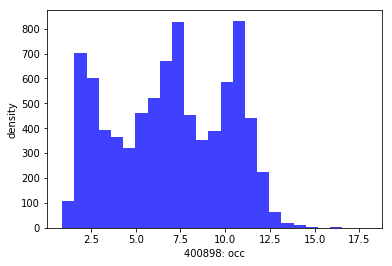

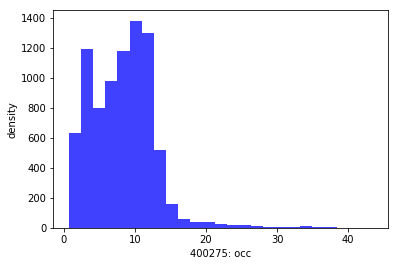

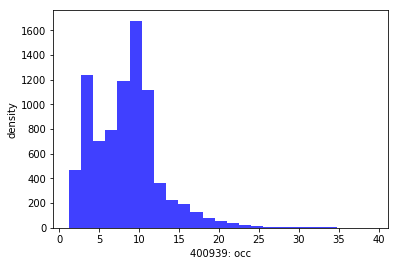

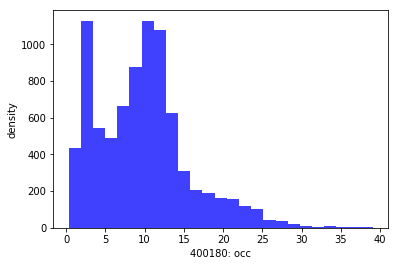

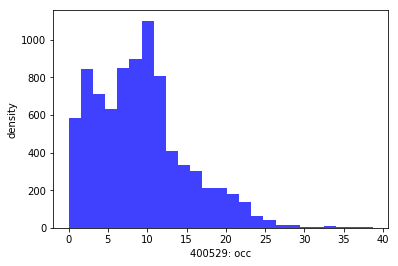

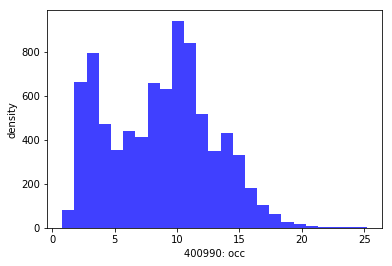

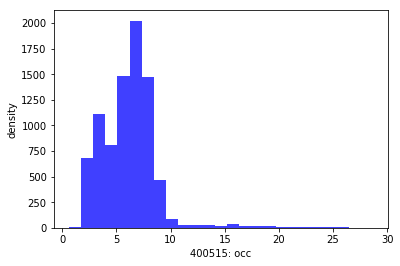

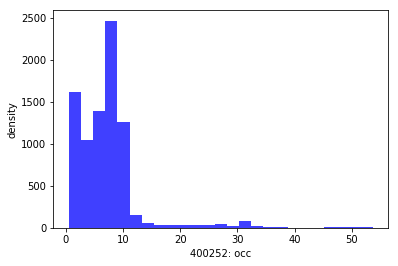

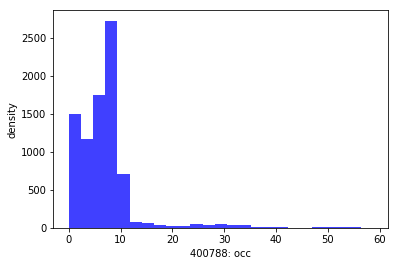

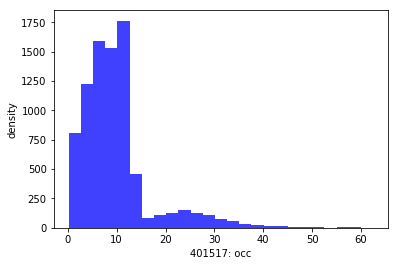

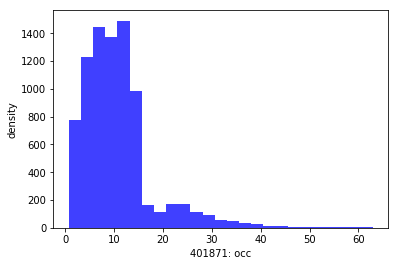

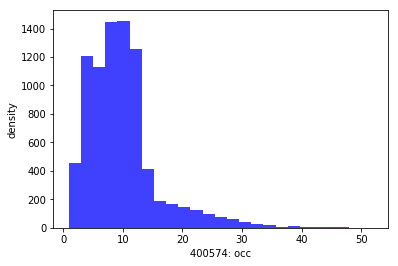

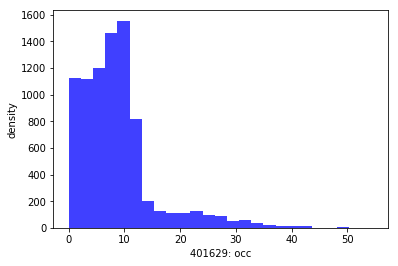

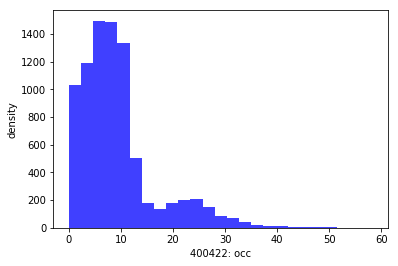

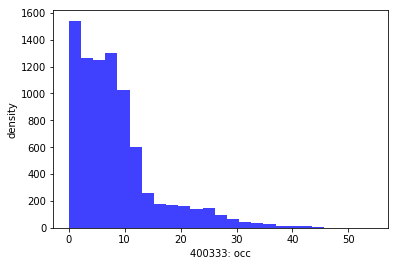

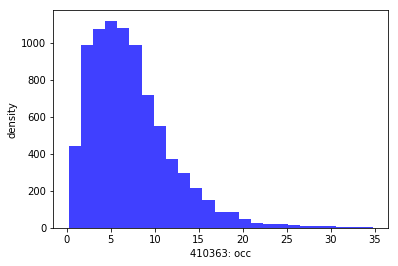

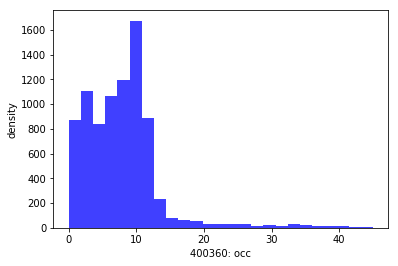

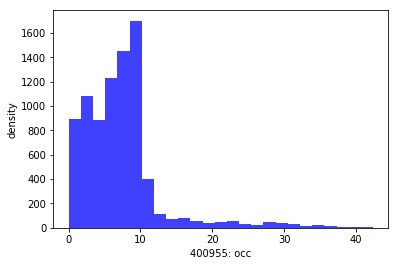

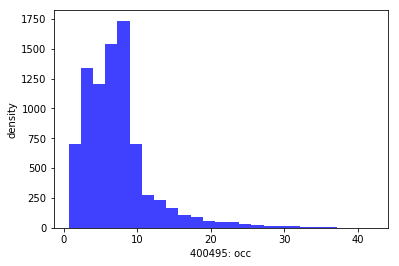

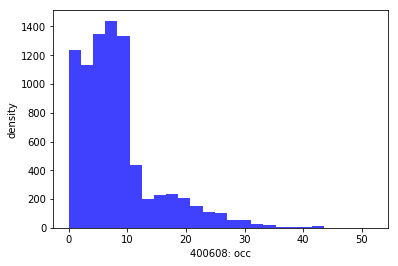

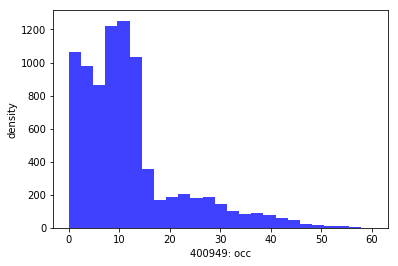

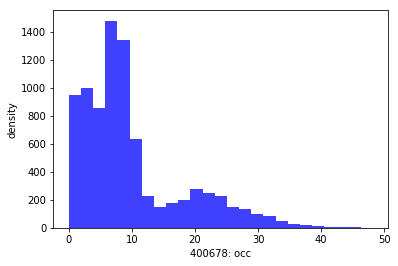

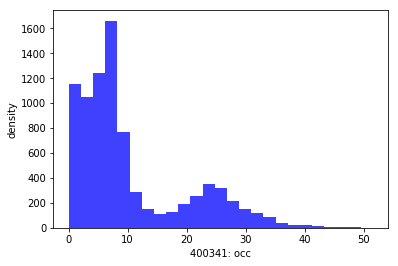

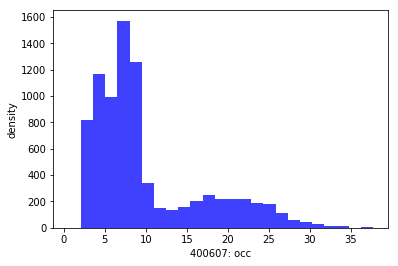

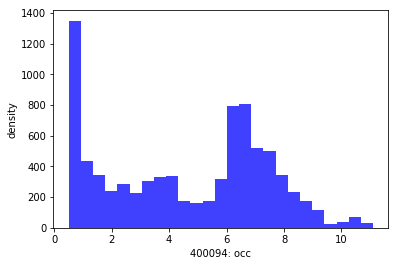

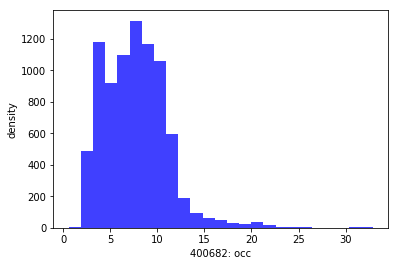

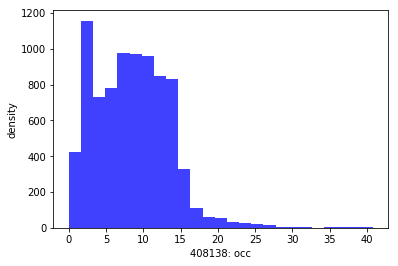

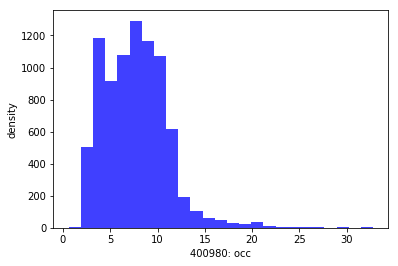

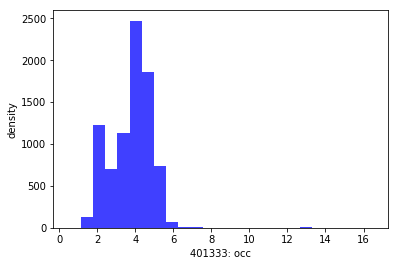

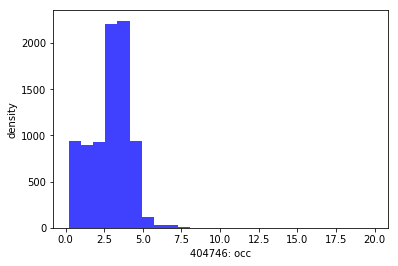

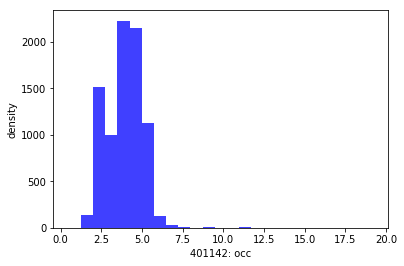

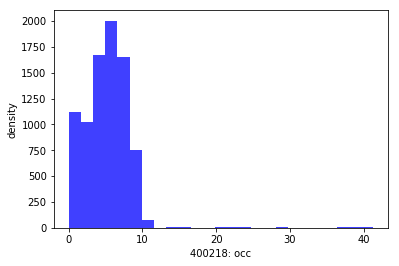

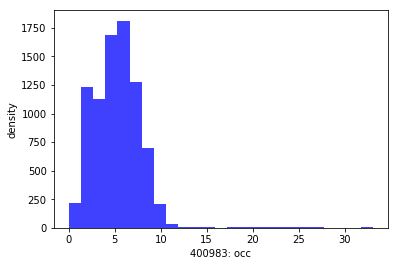

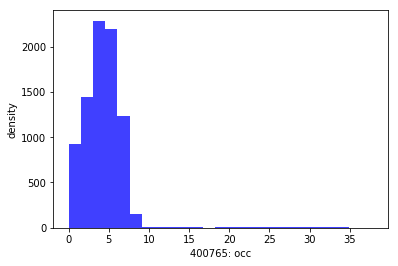

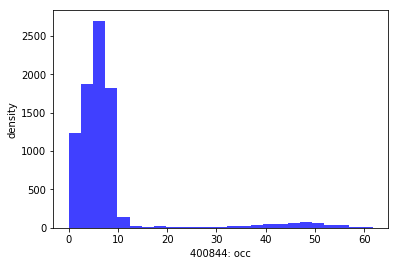

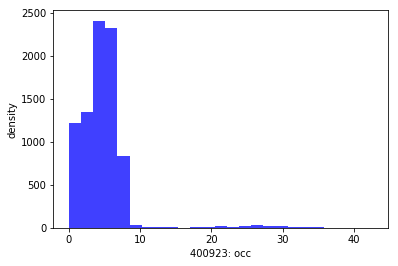

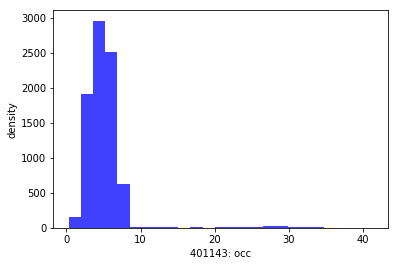

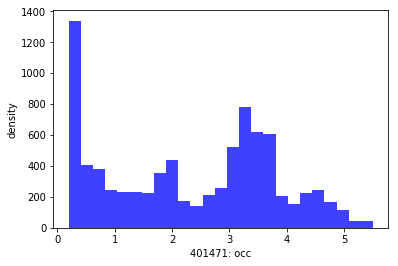

In [35]:
for s in stations:
    occ_s = raw_data.loc[raw_data['Station ID'] == s]['Occupancy'].values
    n, bins, patches = plt.hist(occ_s, 25, density=False, facecolor='b', alpha=.75)
    plt.xlabel(str(s) + ': occ')
    plt.ylabel('density')
    plt.show()

## Kolmogorov-Smirnov Statistic

Normalize data by stations:

In [37]:
sid_idx_dict = dict()
for i, s in enumerate(stations):
    sid_idx_dict[s] = i

In [46]:
norm_data_dict = dict()
all_stations = raw_data['Station ID'].values
norm_data_dict['station'] = all_stations

In [47]:
for i, var in enumerate(var_column_names):
    var_values = raw_data[var].values
    z_scores = []
    col = var_names[i]
    var_means = mean_sd_dict[col + '_mean']
    var_sds = mean_sd_dict[col + '_sd']
    for j, val in enumerate(var_values):
        s_idx = sid_idx_dict[all_stations[j]]
        mu = var_means[s_idx]
        sigma = var_sds[s_idx] 
        z_scores.append( (val - mu) / sigma )
    norm_data_dict[col] = z_scores

In [48]:
norm_data_df = pd.DataFrame(norm_data_dict)

In [49]:
norm_data_df.head(3)

,station,occ,speed,flow
0,408907,-1.036154,0.633662,-1.390417
1,408907,-1.036154,0.546516,-1.390417
2,408907,-1.036154,0.502943,-1.379816


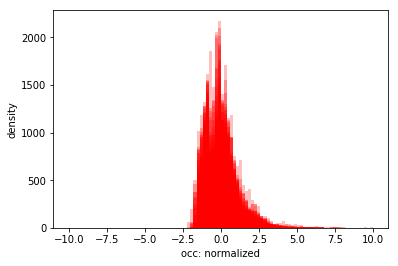

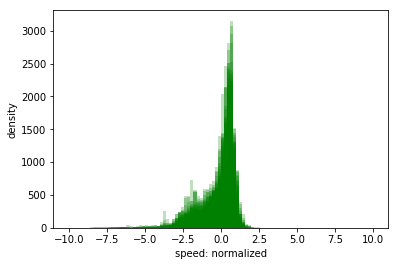

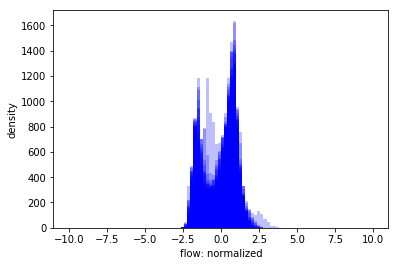

In [59]:
var_colors = ['r', 'g', 'b']
for i, var in enumerate(var_names):
    for j, s in enumerate(stations):
        norm_data_s_df = norm_data_df.loc[norm_data_df['station'] == s]
        var_values = norm_data_s_df[var].values
        n, bins, patches = plt.hist(var_values, 100, range=(-10, 10), density=False, facecolor=var_colors[i], alpha=.25)
    plt.xlabel("{}: normalized".format(var))
    plt.ylabel('density')
    plt.show()

In [60]:
from scipy import stats

### Occupancy KS stat matrix

In [61]:
occ_1 = norm_data_df.loc[norm_data_df['station'] == stations[0]]['occ'].values
occ_2 = norm_data_df.loc[norm_data_df['station'] == stations[1]]['occ'].values

In [64]:
statistic, p = stats.ks_2samp(occ_1, occ_2)

In [66]:
ks_occ_mtx = list()
for i, si in enumerate(stations):
    ks_occ_i = list()
    occ_i = norm_data_df.loc[norm_data_df['station'] == si]['occ'].values
    for j, sj in enumerate(stations):
        occ_j = norm_data_df.loc[norm_data_df['station'] == sj]['occ'].values
        stat, p = stats.ks_2samp(occ_i, occ_j)
        ks_occ_i.append(p)
    ks_occ_mtx.append(ks_occ_i)

In [68]:
ks_occ_mtx_arr = np.array(ks_occ_mtx)